## 그래프 시각화
### 1. 서울시 환자발생지를 기준으로 급성심정지환자수
### 2. 서울시 구별 노인인구비율 
### 3. 서울시 구별 주민등록상인구 
### 4. 서울시 구별 AED 개수 
### 5. 서울시 환자발생지를 기준으로 급성심정지환자 발생장소
### 6. 서울시 환자발생지를 기준으로 급성심정지환자 성별
### 7. 서울시 환자발생지를 기준으로 급성심정지환자 연령대
### 8. 서울시 환자발생지를 기준으로 급성심정지환자 심페소생술 시행종류
- 데이터 
    - 서울시_환자거주지별_급성심정지환자_최종.csv
    - 서울시_구별_급성심정지환자(거주지기준).csv"
    - 서울시_환자발생지별_급성심정지환자_최종.csv
    - 서울시_구별_급성심정지환자(발생지기준).csv"
    - 서울시_구별_위경도포함_노인인구.csv
    - 서울특별시(구별)_18_19_20주민등록인구.csv
    - 지하철역에서_가까운_AED_inner300m.csv
    - 지하철역에서_가까운_AED_inner300m_개수_소재지추가.csv
    - 서울시_구별_AED개수.csv

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
import seaborn as sns

In [2]:
# 그래프 시각화 라이브러리 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import json

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':  # 맥OS 
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':  # 윈도우
#     path = "c:/Windows/Fonts/malgun.ttf"
#     font_name = font_manager.FontProperties(fname=path).get_name()
#     rc('font', family=font_name)
# else:
#     print('Unknown system...  sorry~~~')

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity="all"

import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [23]:
# 급성심정지(거주지기준) 데이터 불러오기
data1 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_환자거주지별_급성심정지환자_최종.csv") 

# 급성심정지(거주지기준) 데이터 불러오기
data2 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_급성심정지환자(거주지기준).csv") 

# 급성심정지(발생지기준) 데이터 불러오기
data3 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_환자발생지별_급성심정지환자_최종.csv") 

# 급성심정지(발생지기준) 데이터 불러오기
data4 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_급성심정지환자(발생지기준).csv") 

# 노인인구 데이터 불러오기
data5 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_위경도포함_노인인구.csv") 

# 주민등록상인구 데이터 불러오기
data6 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울특별시(구별)_18_19_20주민등록인구.csv")

# AED개수 데이터 불러오기 
data7 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_AED개수.csv")

# 지하철역 반경 300m 데이터 불러오기
data8 = pd.read_csv("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/지하철역에서_가까운_AED_inner300m_개수_소재지추가.csv")

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

In [32]:
# data2에 소재지 미상 확인 
A = data2[data2['소재지'] == '미상'].index
data2.drop(A,axis='index',inplace=True)
data2

,Unnamed: 0,발생년도,환자거주지_시도,소재지,성별,연령(만),연령대,환자발생장소_시도,환자발생장소_시군구,발생장소,시행종류
0,0,2018,서울,용산구,여성,83,노년,서울,용산구,비공공장소,NO
1,1,2018,서울,중구,여성,67,노년,서울,중구,비공공장소,NO
2,2,2018,서울,노원구,남성,46,중년,서울,중구,공공장소,NO
3,3,2018,서울,동작구,남성,91,노년,서울,동작구,비공공장소,CPR
4,4,2018,서울,동작구,여성,61,장년,서울,동작구,비공공장소,CPR
...,...,...,...,...,...,...,...,...,...,...,...
13607,13607,2020,서울,송파구,남성,80,노년,제주,제주시,비공공장소,NO
13608,13608,2020,서울,영등포구,남성,28,청년,제주,제주시,미상,NO
13609,13609,2020,서울,강동구,여성,59,장년,제주,서귀포시,공공장소,CPR
13610,13610,2020,서울,영등포구,남성,71,노년,세종,세종특별자치시,공공장소,NO


In [33]:
# data4에 소재지 미상 확인 
B = data4[data4['소재지'] == '미상'].index
# B = B.drop([B.index[4613]])
# B = B..drop([B.index[5469]])
B

Int64Index([], dtype='int64')

In [6]:
# 한글폰트사용
from matplotlib import font_manager,rc
font_path = "C:/sooeun/DATAexam/전공프로젝트(빅데이터)/a타이틀고딕2.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

In [7]:
plt.style.use("default")
plt.rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

### 1. 서울시 환자거주지를 기준으로 급성심정지환자수 

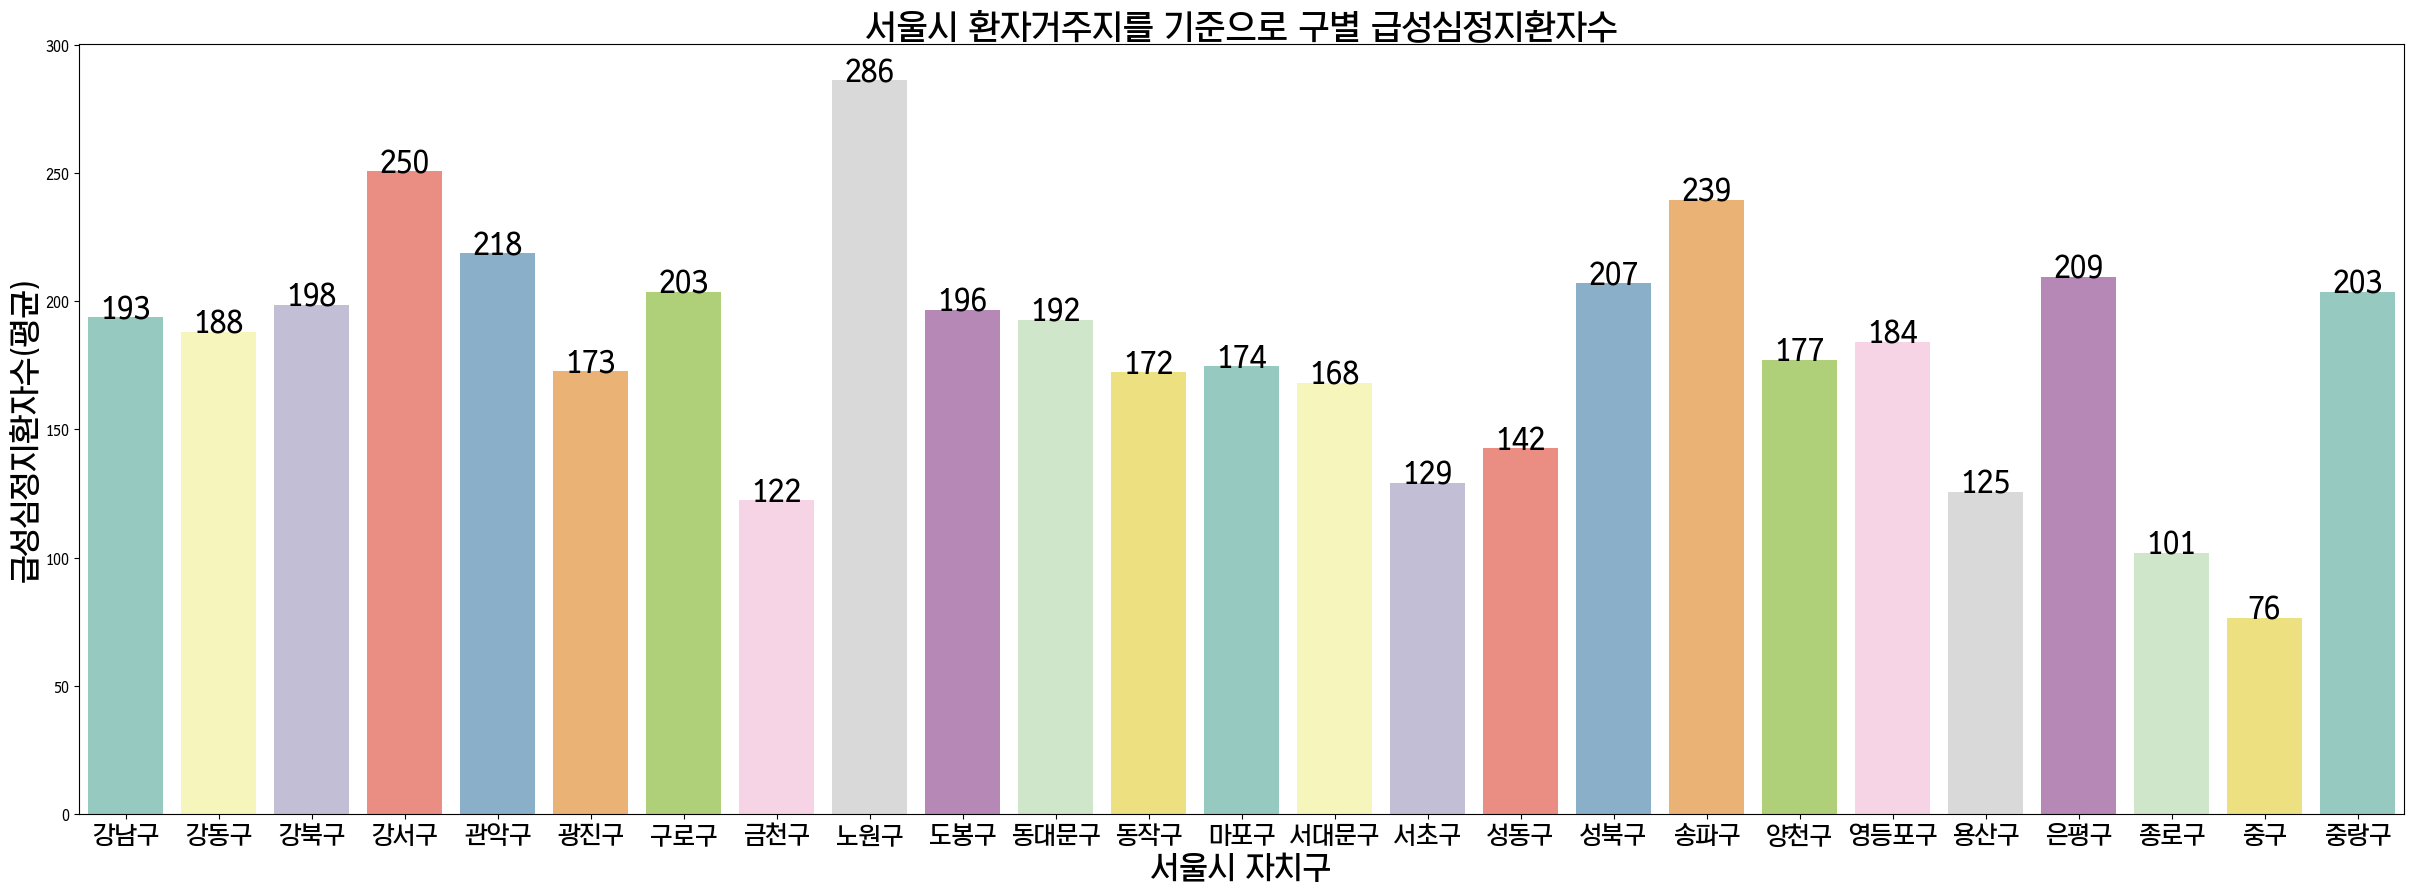

In [9]:
# 서울시 환자거주지를 기준으로 구별 급성심정지환자수 평균

fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data1, x=data1.거주지소재지.sort_values(), y='arrest_count_mean', palette="Set3")
ax.set_title("서울시 환자거주지를 기준으로 구별 급성심정지환자수", size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("급성심정지환자수(평균)",size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')
    
plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_거주지기준_급성심정지환자수.png")
plt.show()

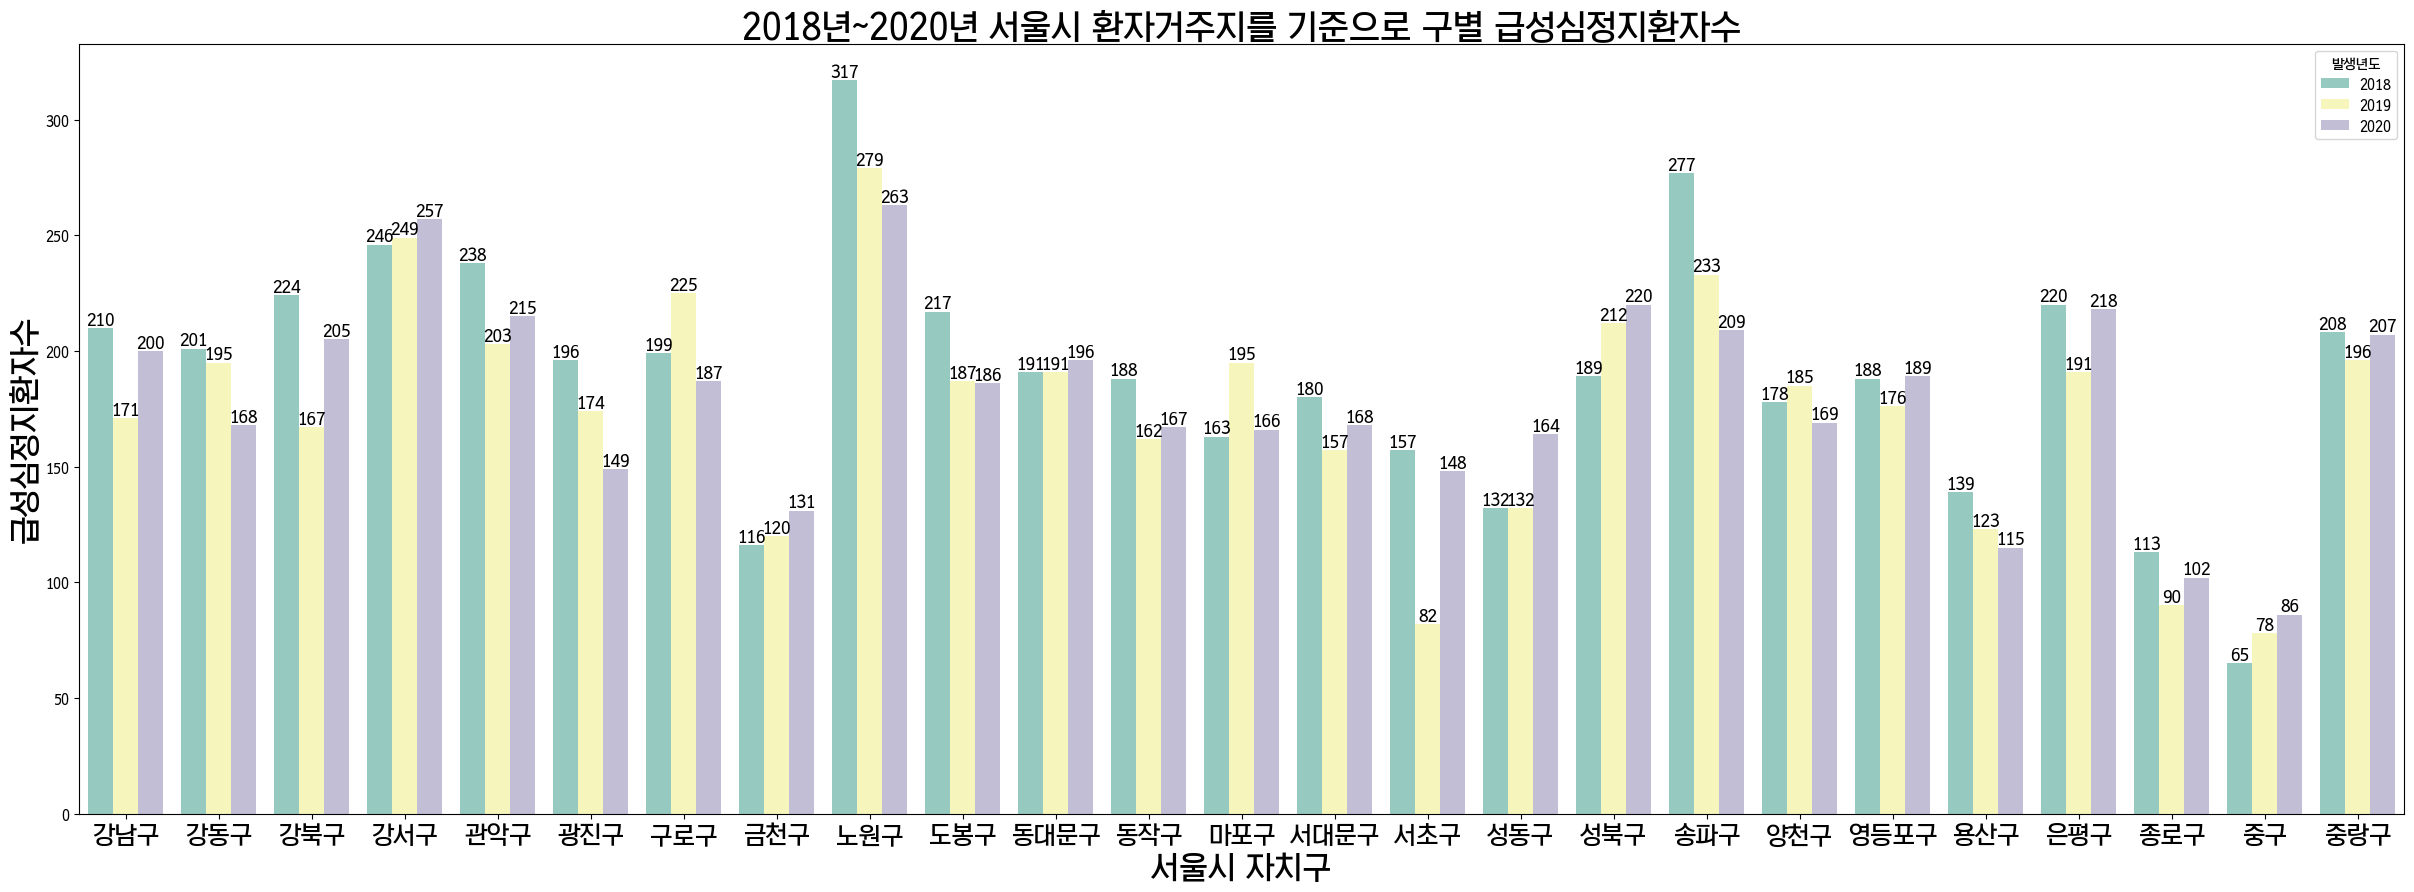

In [12]:
# 서울시 환자거주지를 기준으로 급성심정지환자수(2018년,2019년,2020년)
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data2, x=data2.소재지.sort_values(), hue='발생년도', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자거주지를 기준으로 구별 급성심정지환자수', size =25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자수',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시(2018~2020)_구별_거주지기준_급성심정지환자수.png")
plt.show()

### 2. 서울시 환자발생지를 기준으로 급성심정지환자수

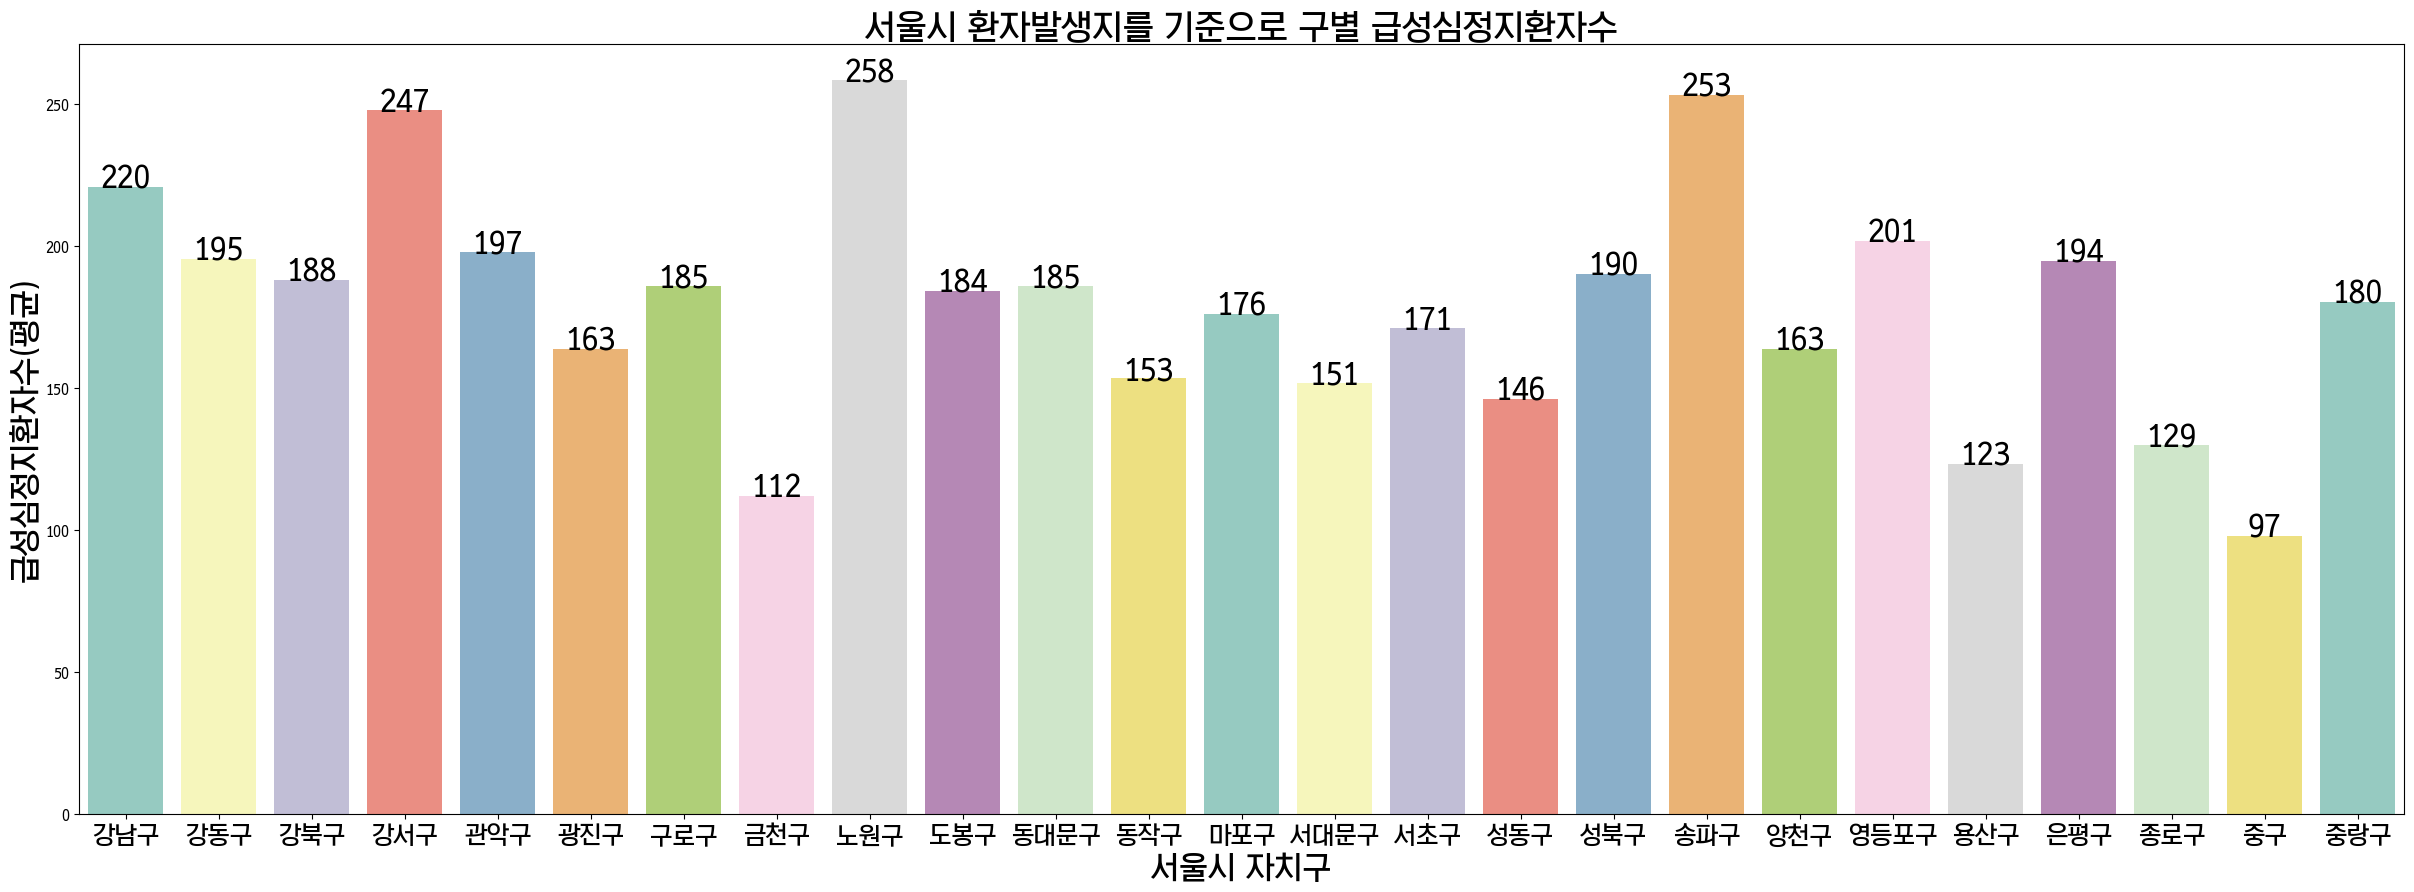

In [13]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자수 평균
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data3, x=data3.발생지소재지.sort_values(), y='arrest_count_mean', palette="Set3")
ax.set_title("서울시 환자발생지를 기준으로 구별 급성심정지환자수", size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("급성심정지환자수(평균)",size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_발생지기준_급성심정지환자수.png")
plt.show()

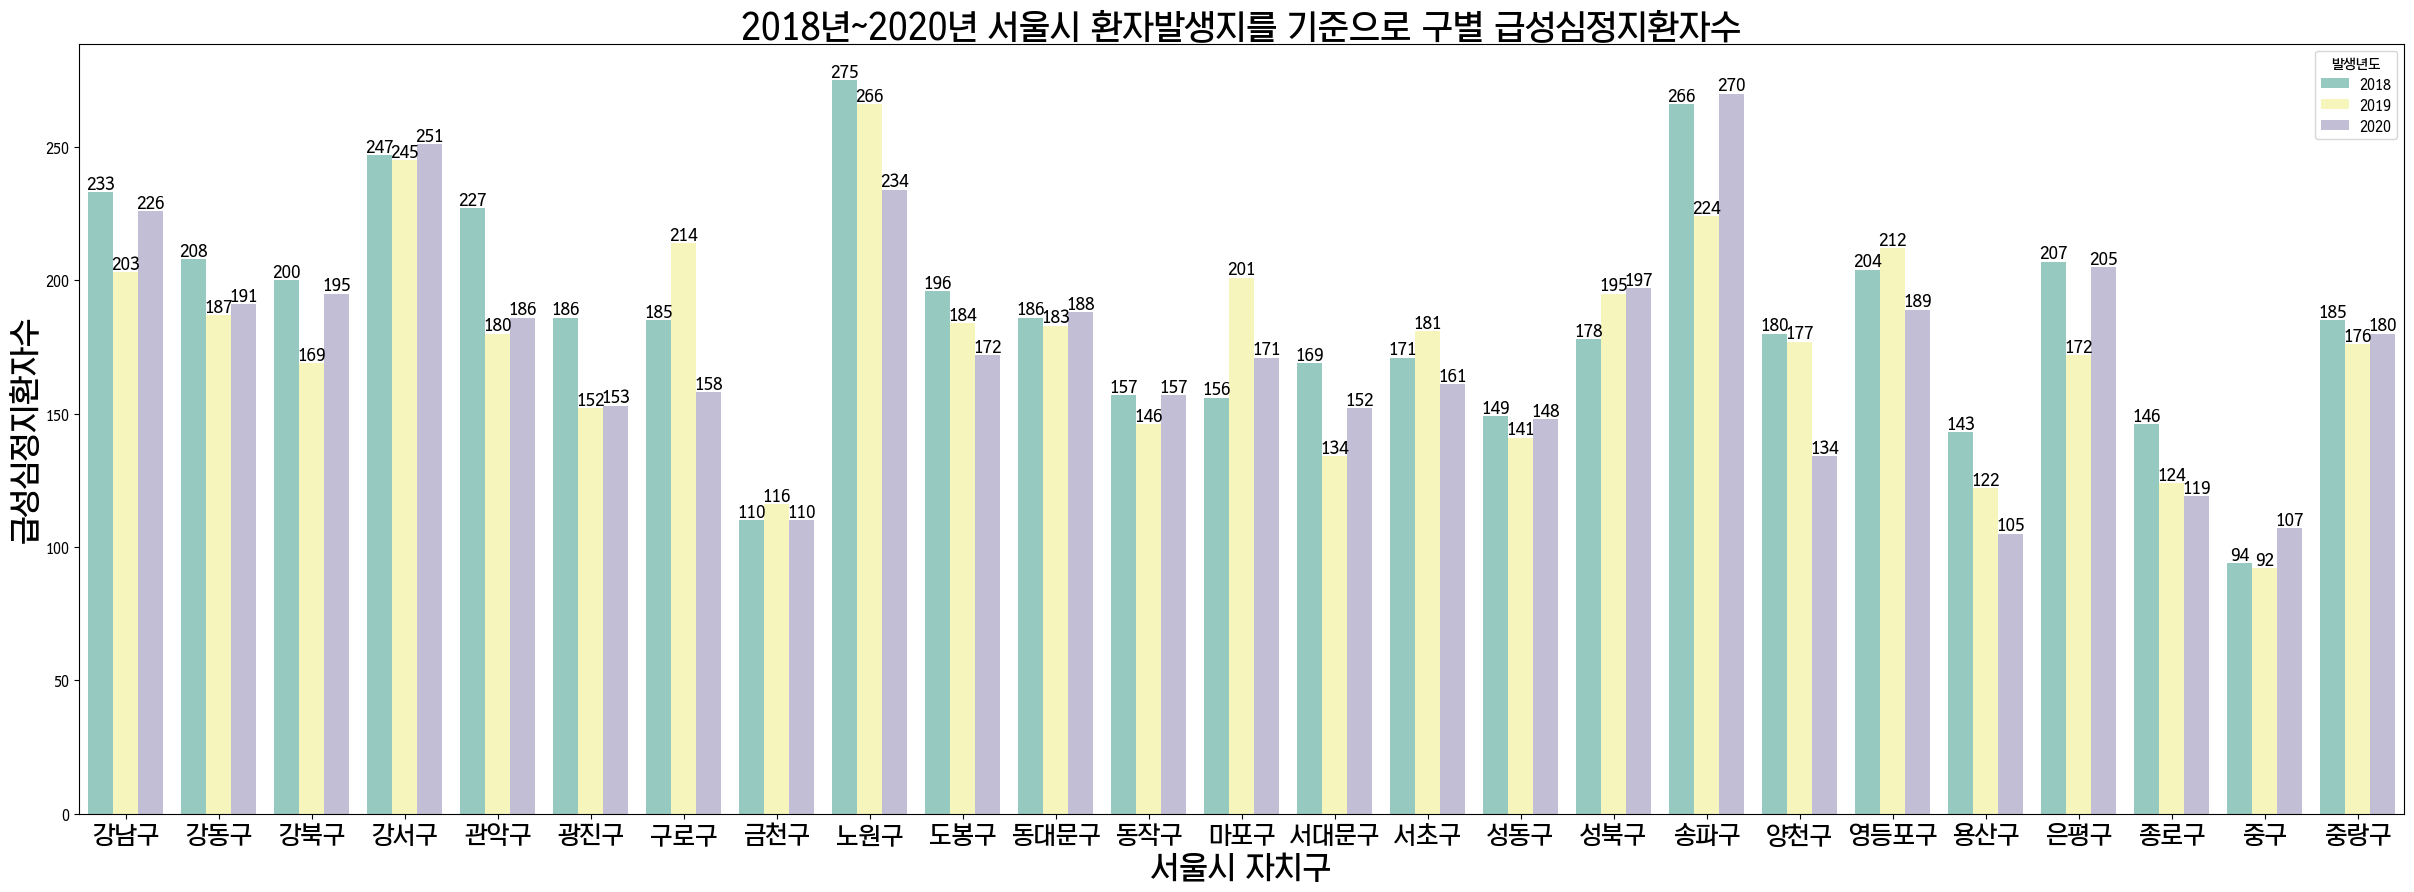

In [14]:
# 서울시 환자발생지를 기준으로 급성심정지환자수(2018년,2019년,2020년)
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data4, x=data4.소재지.sort_values(), hue='발생년도', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자발생지를 기준으로 구별 급성심정지환자수', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자수',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시(2018~2020)_구별_발생지기준_급성심정지환자수.png")
plt.show()

### 3. 서울시 구별 노인인구

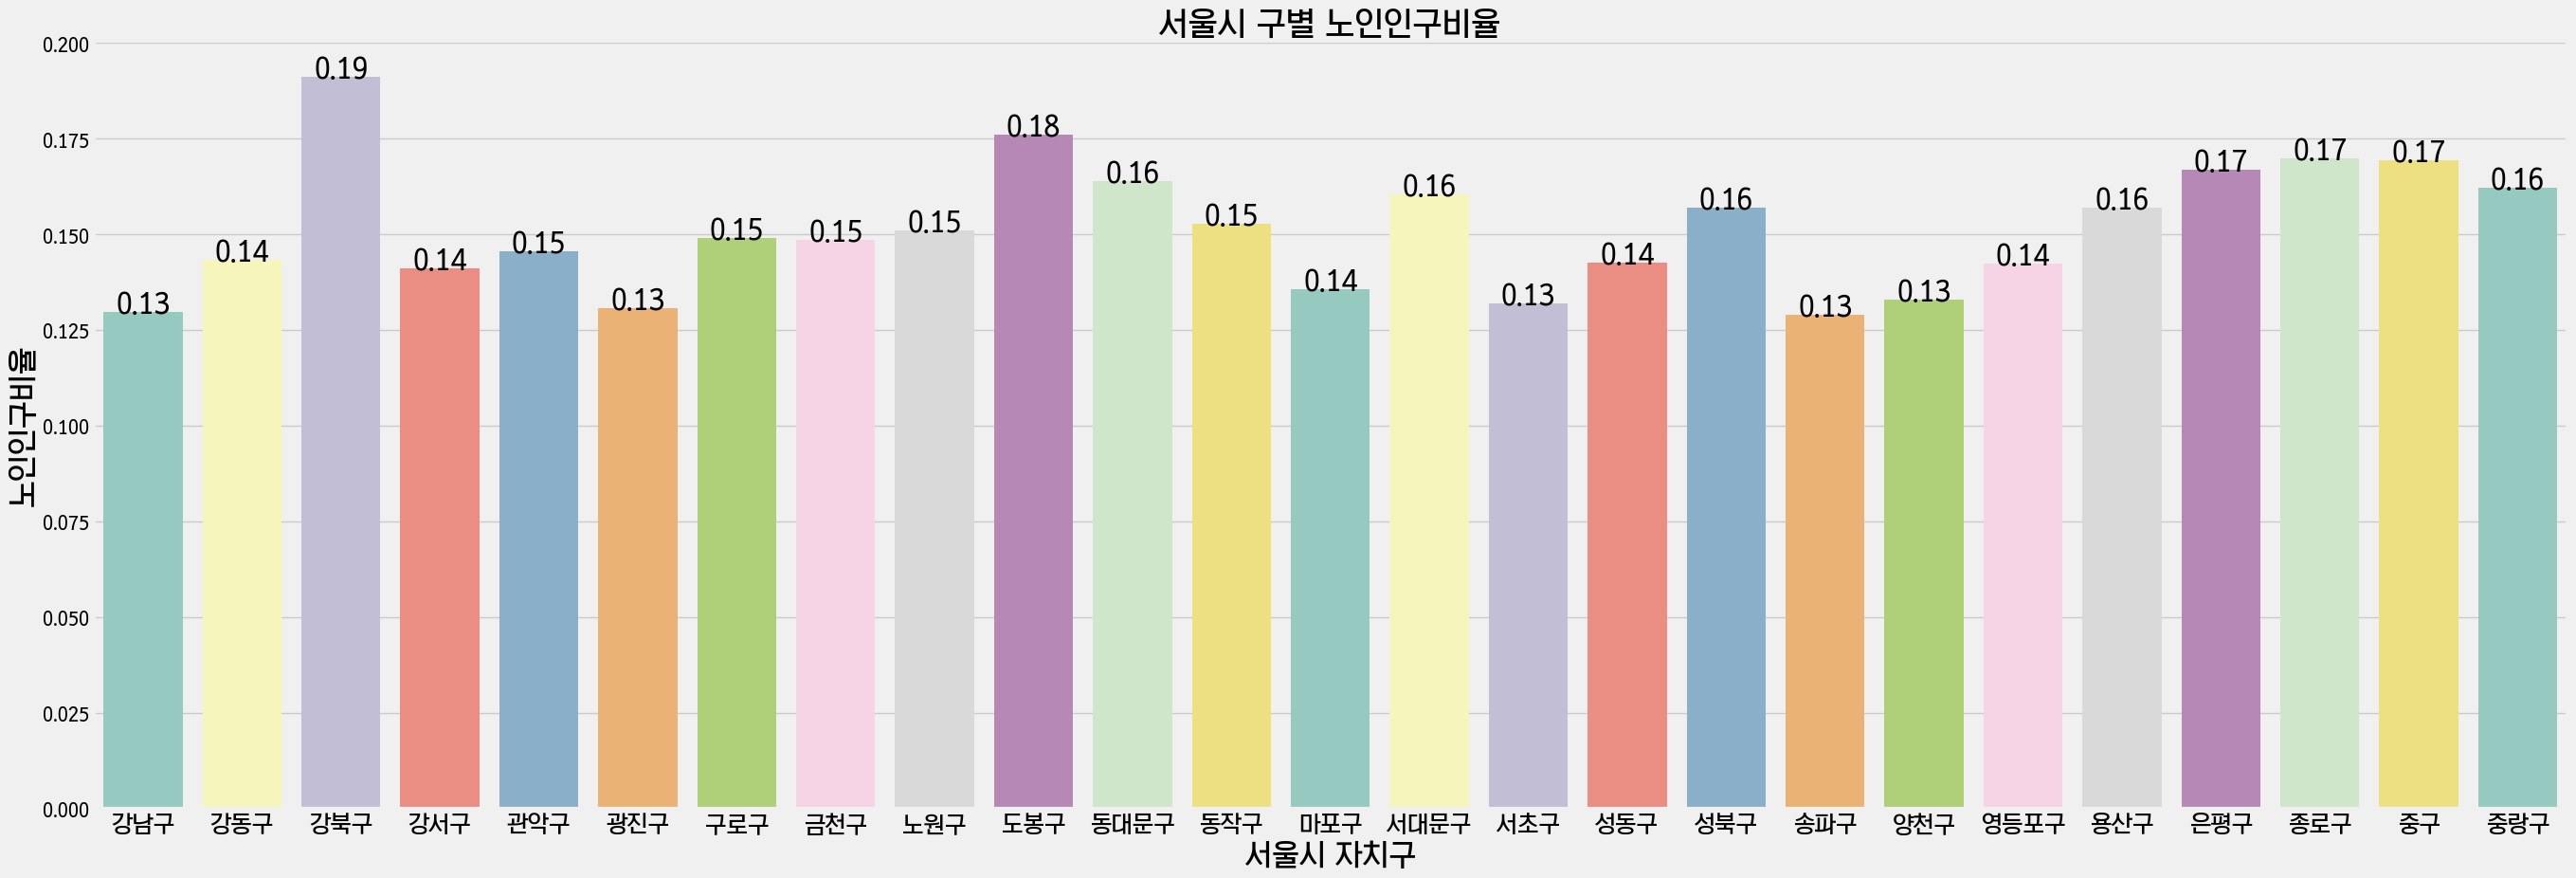

In [24]:
# 서울시 구별 노인인구비율
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data5, x=data5.소재지.sort_values(), y='노인인구비율', palette="Set3")
ax.set_title("서울시 구별 노인인구비율", size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("노인인구비율",size = 23)
ax.tick_params(axis="x", labelsize=18)

### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구비율.png")
plt.show()

In [25]:
# 서울시 구별 노인인구(누적)
data5 = data5[['소재지','2018년노인인구','2019년노인인구','2020년노인인구']]
data5.loc[:, '노인인구'] = data5.loc[:, '2018년노인인구':'2020년노인인구'].sum(axis=1)
data5

,소재지,2018년노인인구,2019년노인인구,2020년노인인구,노인인구
0,강남구,66957,70896,74959,212812
1,강동구,58669,63341,69903,191913
2,강북구,58103,60474,63313,181890
3,강서구,79445,83839,88733,252017
4,관악구,71888,74787,78430,225105
5,광진구,45432,47681,50311,143424
6,구로구,61105,64932,69201,195238
7,금천구,35354,37196,39314,111864
8,노원구,77032,80854,85420,243306
9,도봉구,55926,58664,62009,176599


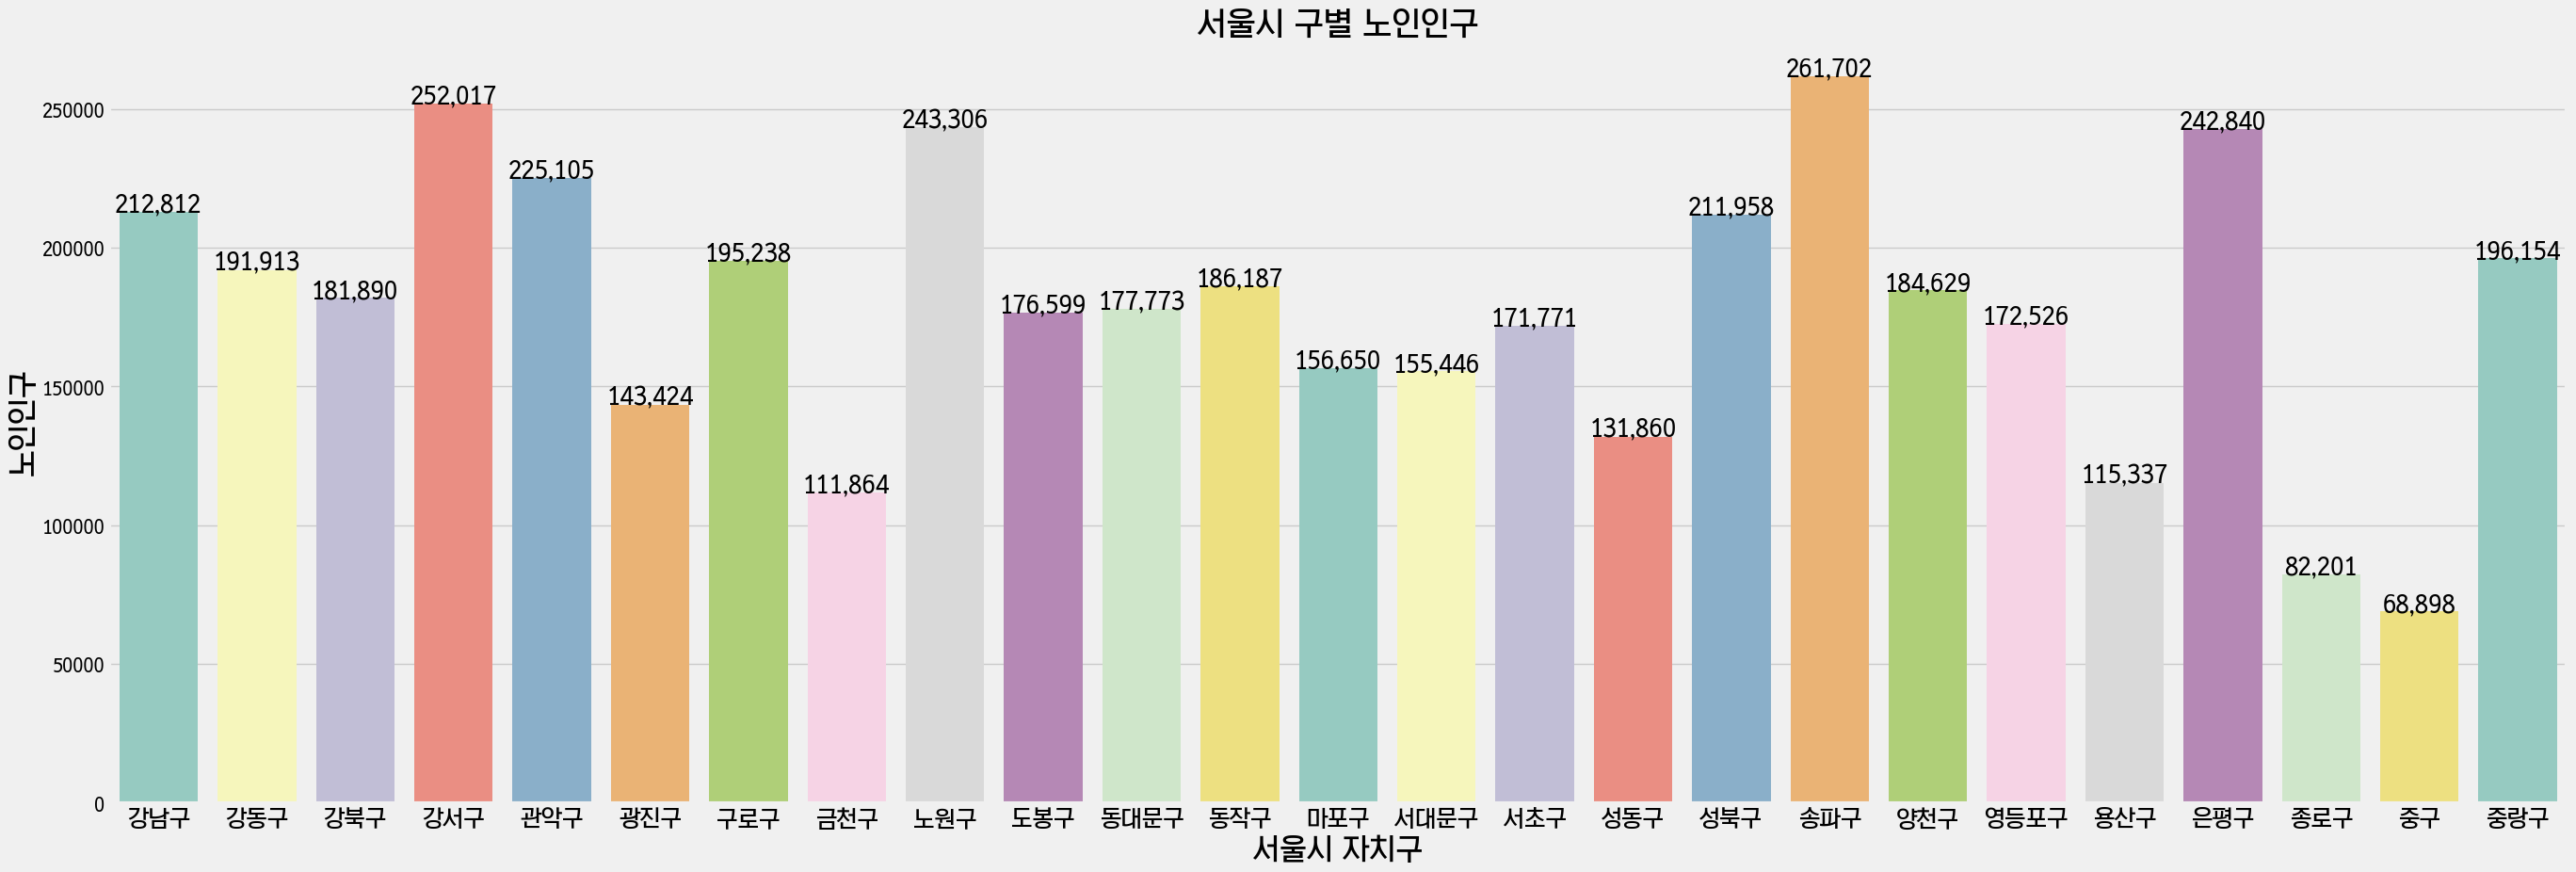

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data5, x=data5.소재지.sort_values(), y='노인인구', palette="Set3")
ax.set_title("서울시 구별 노인인구", size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("노인인구",size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_노인인구.png")
plt.show()

### 4. 서울시 구별 주민등록상인구 

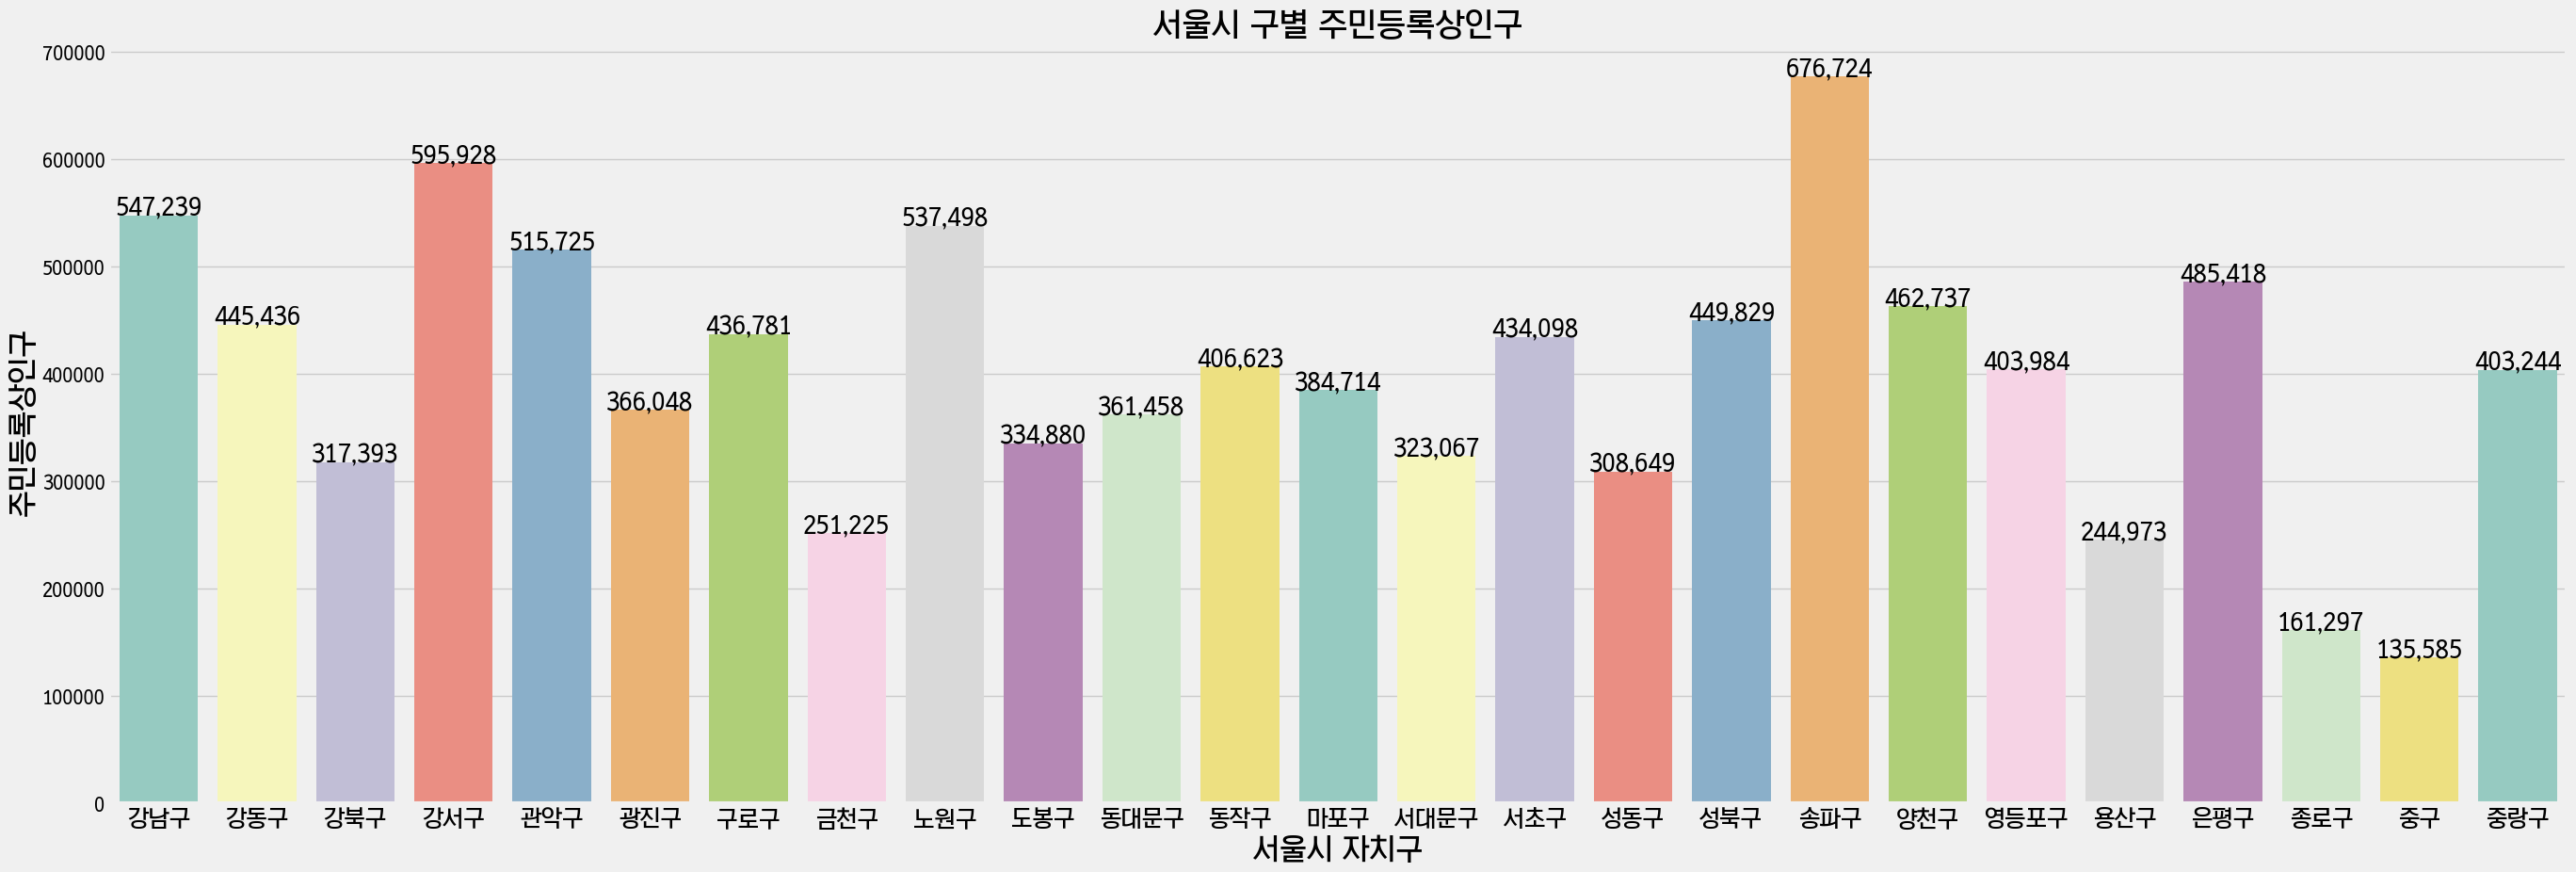

In [27]:
# 서울시 구별 주민등록상인구
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data6, x=data6.소재지.sort_values(), y='구별 거주인구 평균', palette="Set3")
ax.set_title("서울시 구별 주민등록상인구", size = 25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("주민등록상인구",size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_주민등록상인구.png")
plt.show()

### 5. 서울시 구별 AED 개수 

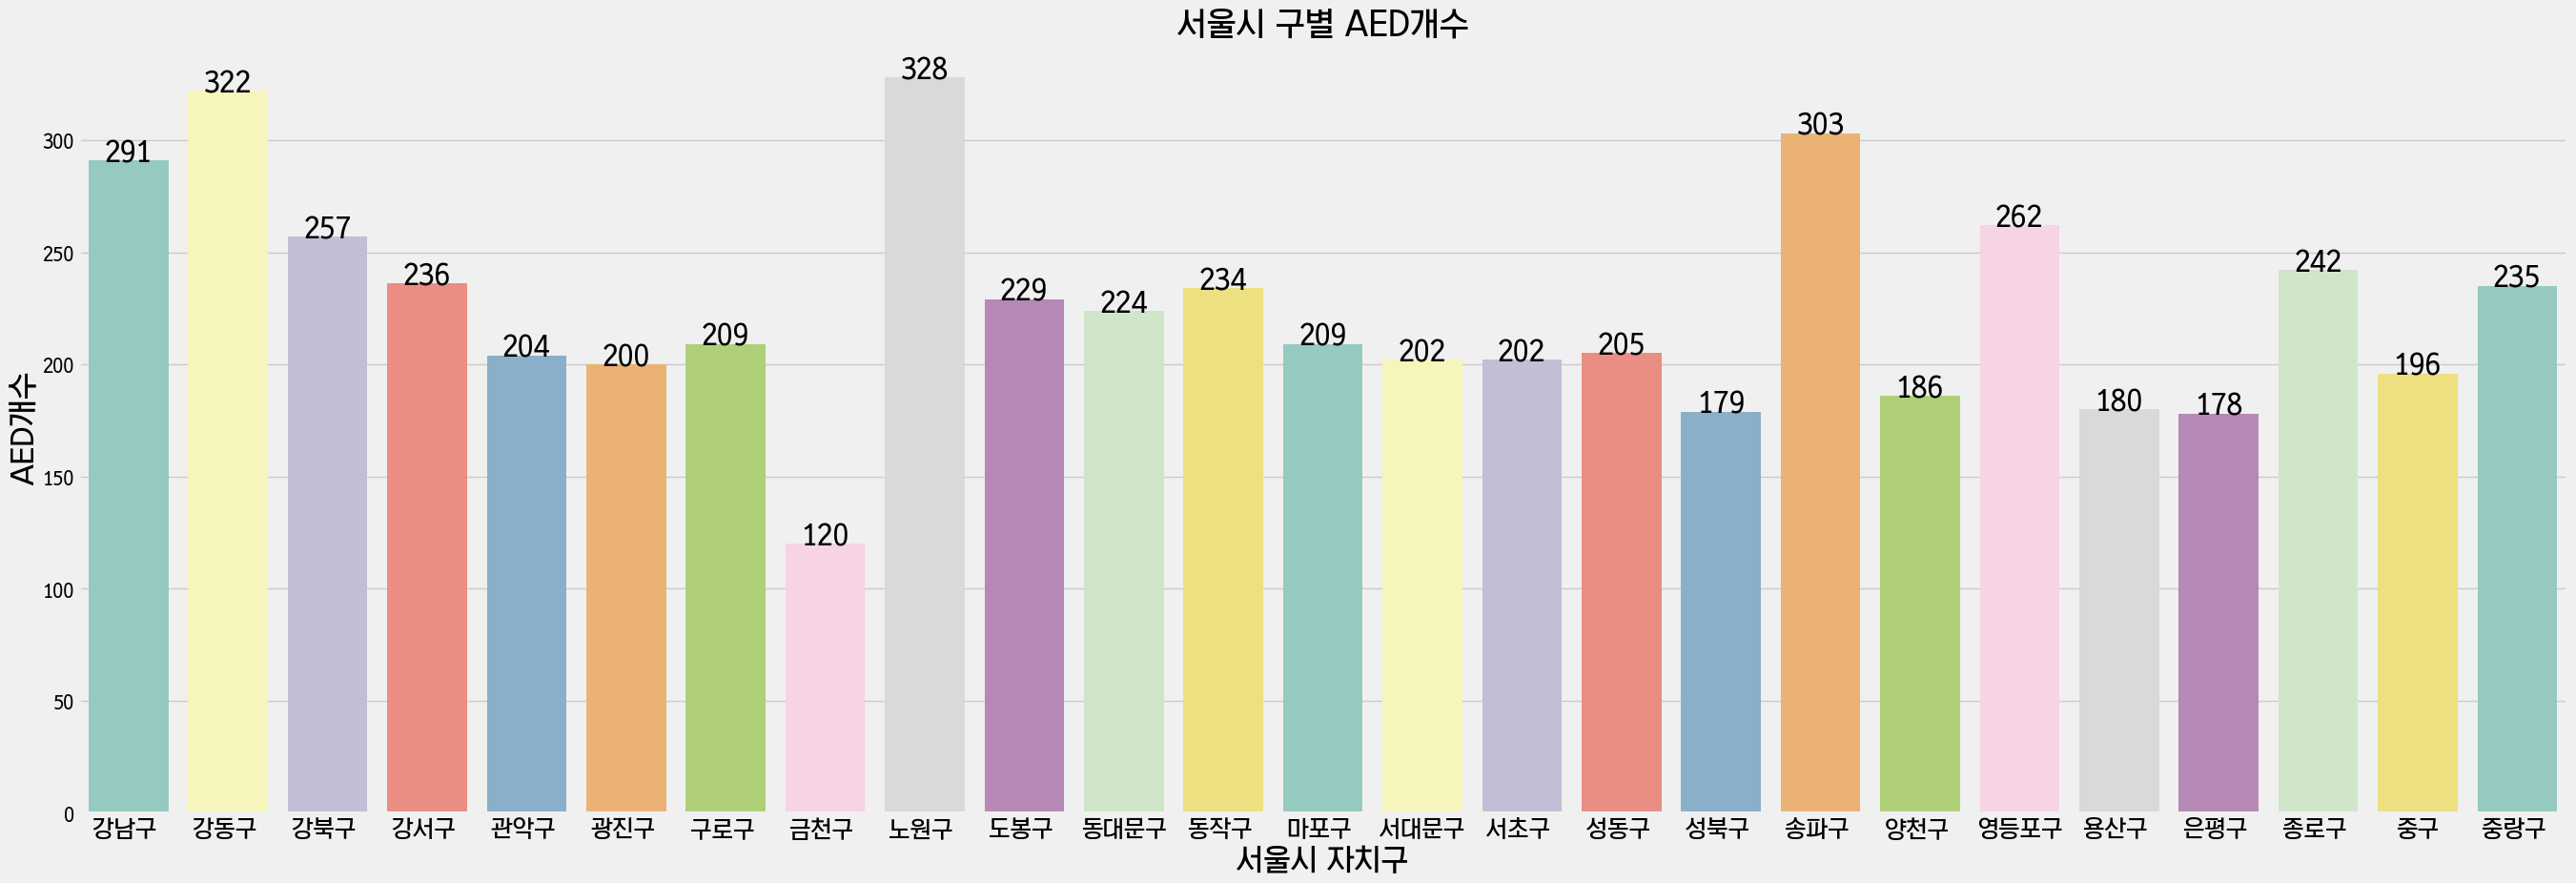

In [28]:
# 서울시 구별 AED개수 
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data7, x=data7.소재지.sort_values(), y='AED개수', palette="Set3")
ax.set_title("서울시 구별 AED개수", size =25)
ax.set_xlabel("서울시 자치구", size = 23)
ax.set_ylabel("AED개수",size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_AED개수.png")
plt.show()

### 6. 서울시 구별 지하철역 반경 300m AED 개수 

In [29]:
data8
data8_count = data8.pivot_table(index = '소재지',
                        values = '300m 이내 AED 개수',
                        aggfunc = 'mean')
data8_count.reset_index(inplace=True)
data8_count

,소재지,300m 이내 AED 개수
0,강남구,5.296296
1,강동구,7.166667
2,강북구,7.181818
3,강서구,3.611111
4,관악구,5.500000
5,광진구,6.111111
6,구로구,4.272727
7,금천구,5.333333
8,노원구,5.538462
9,도봉구,5.500000


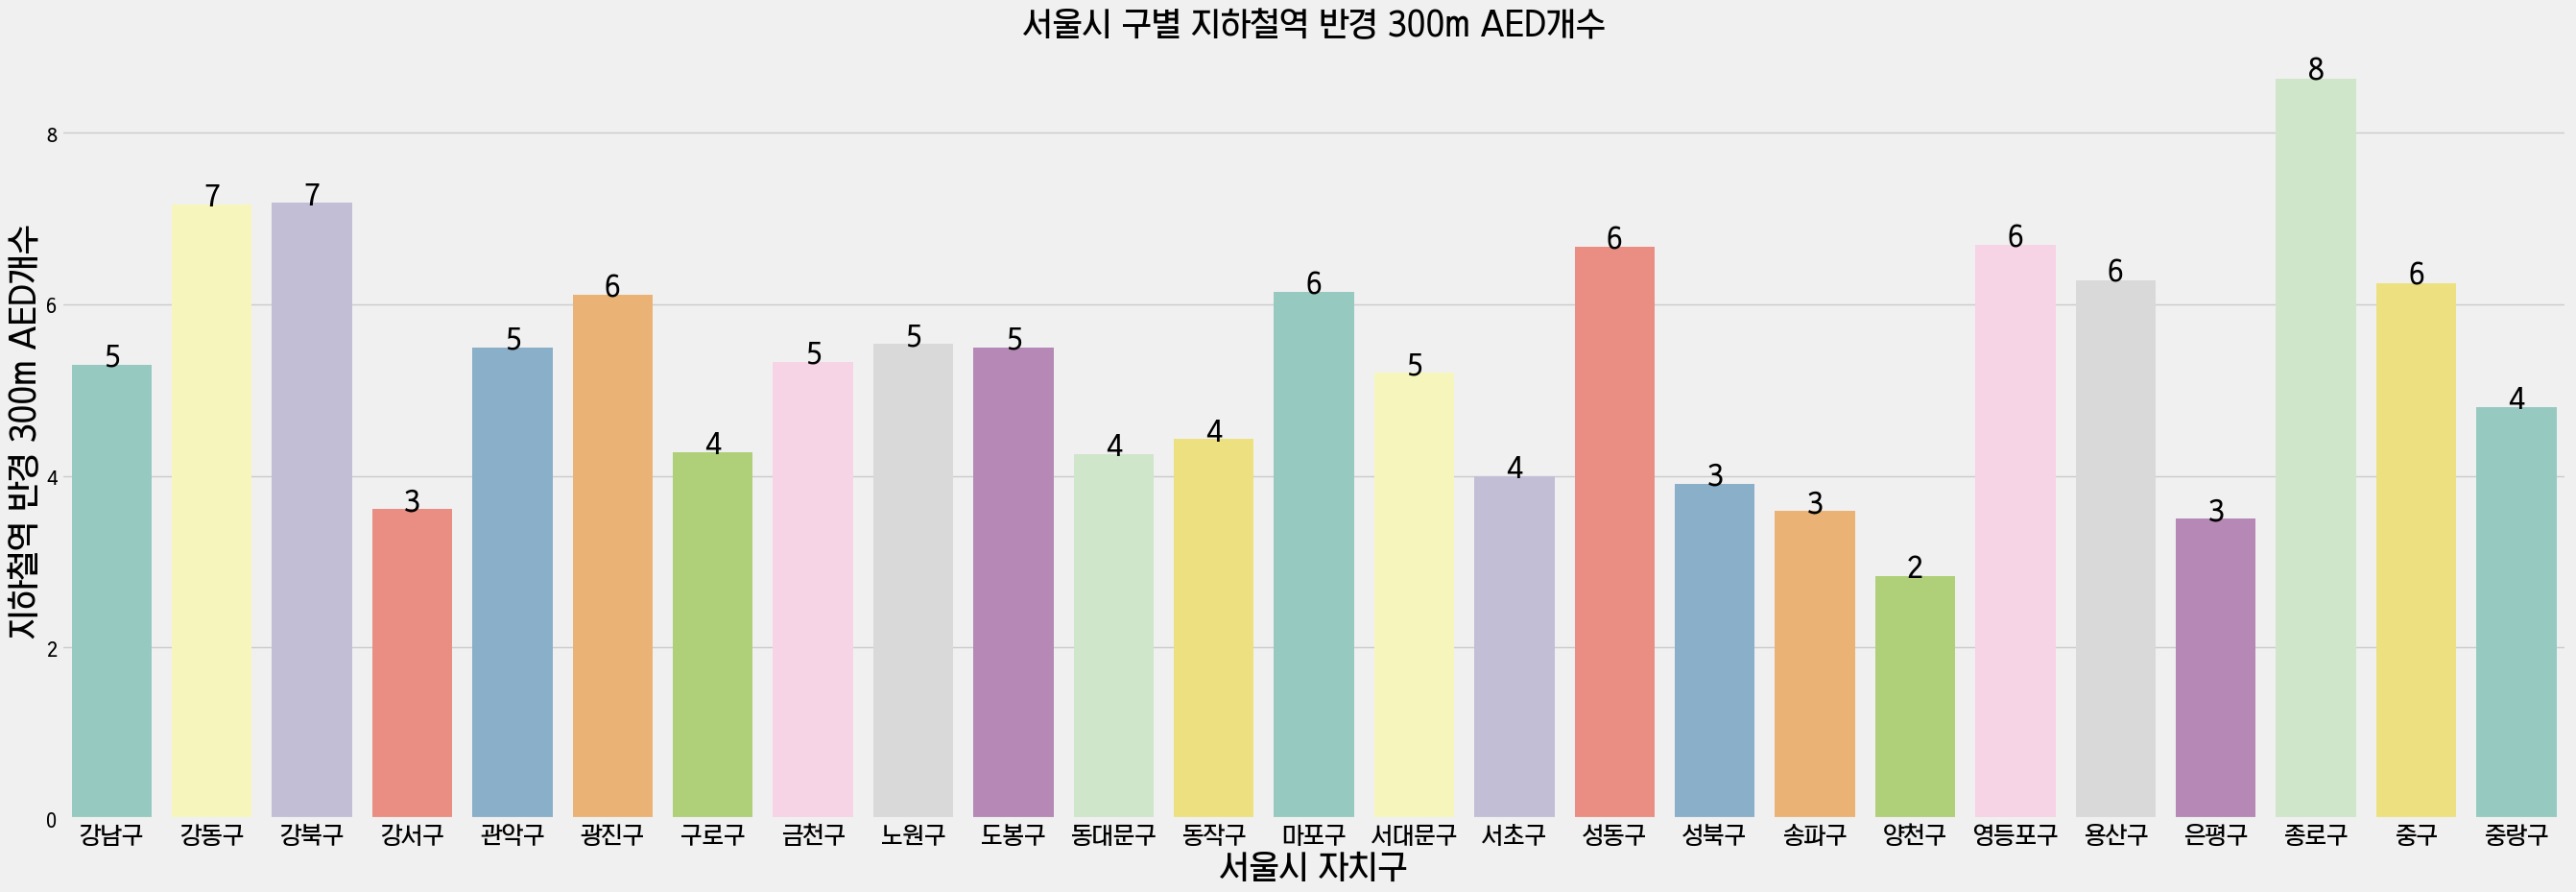

In [30]:
# 서울시 구별 지하철 반경 300m AED개수
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=data8_count, x=data8_count.소재지.sort_values(), y='300m 이내 AED 개수', palette="Set3")
ax.set_title("서울시 구별 지하철역 반경 300m AED개수", size = 25)
ax.set_xlabel("서울시 자치구", size = 25)
ax.set_ylabel("지하철역 반경 300m AED개수",size = 25)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=21, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_지하철역반경300m_AED개수.png")
plt.show()

### 7. 서울시 환자거주지를 기준으로 급성심정지환자 발생장소 

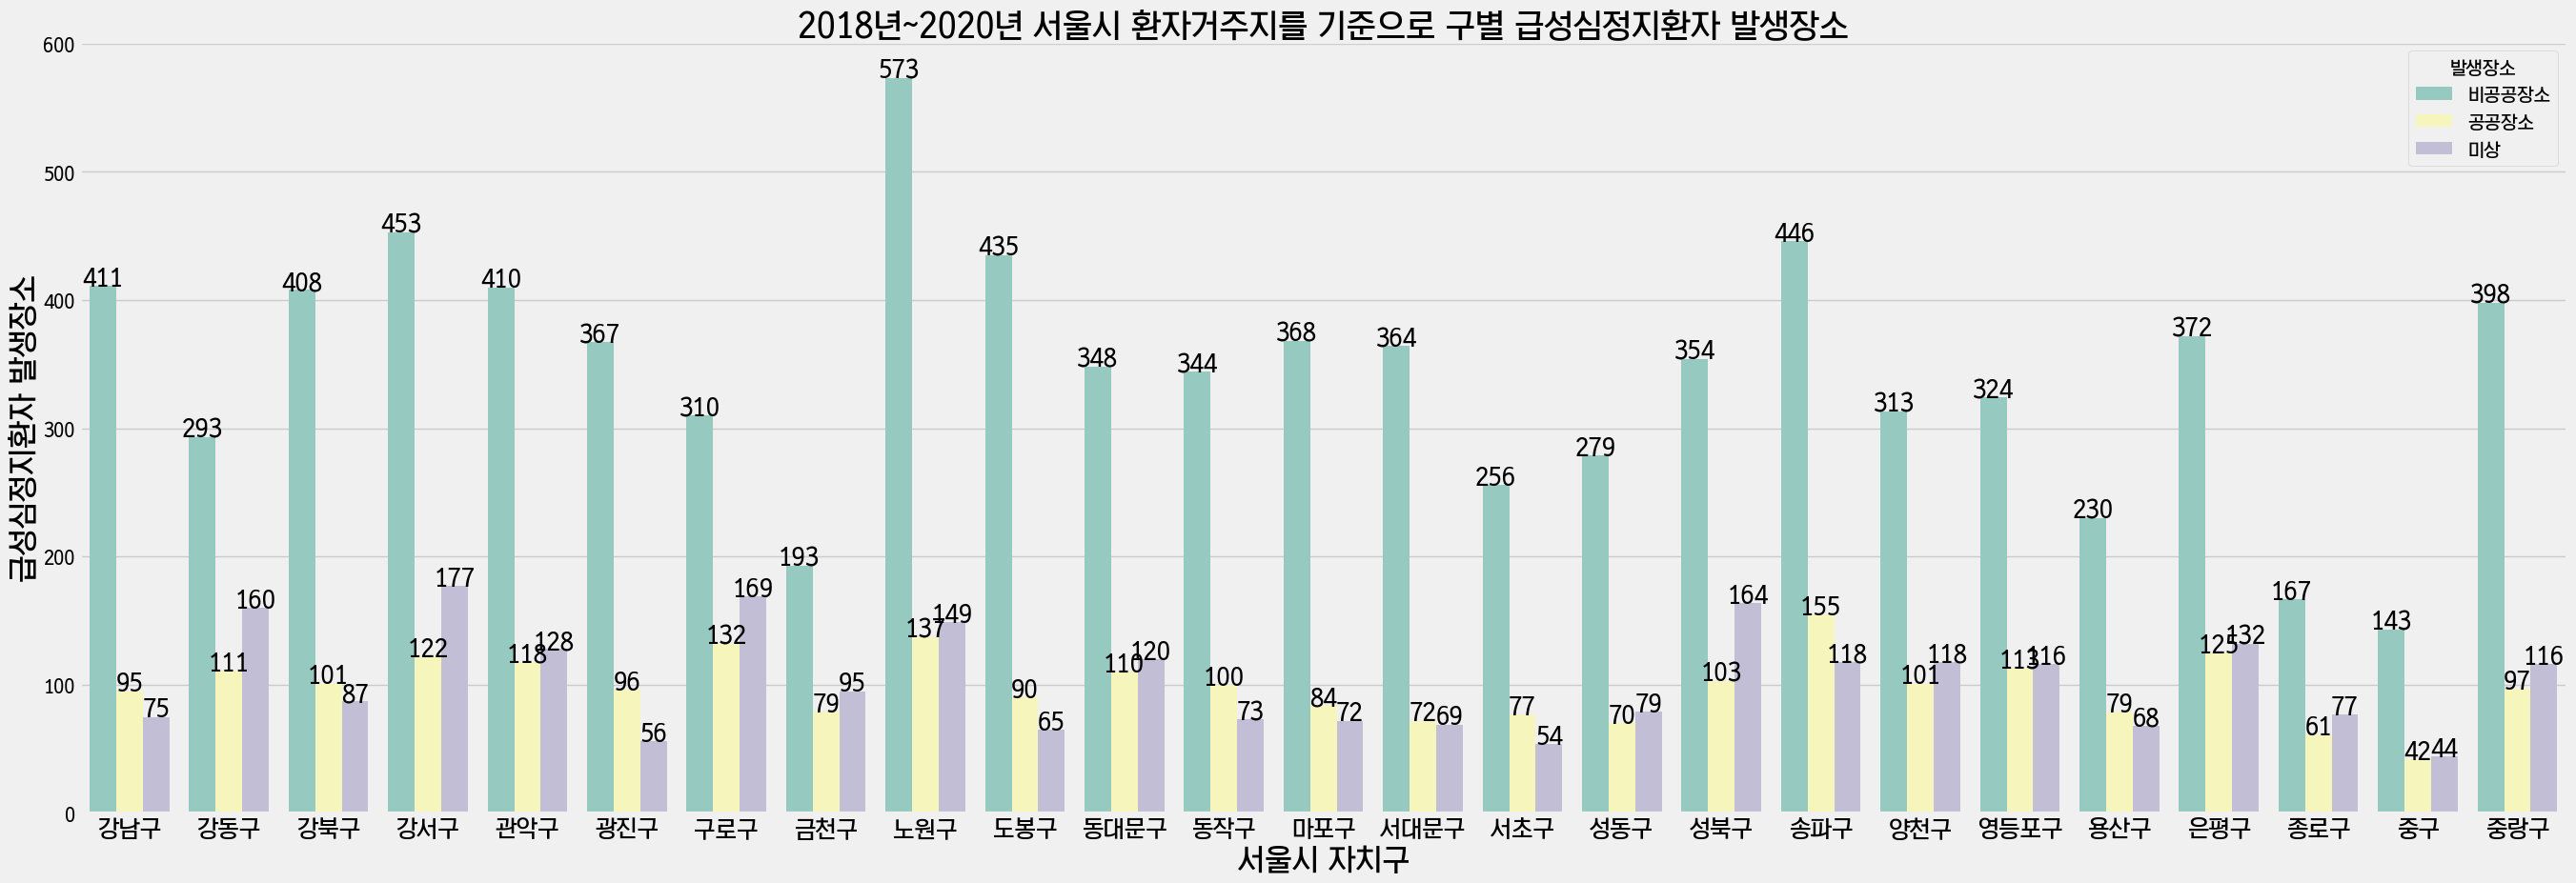

In [34]:
# 서울시 환자거주지를 기준으로 구별 급성심정지환자 발생장소
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data2, x=data2.소재지.sort_values(), hue='발생장소', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자거주지를 기준으로 구별 급성심정지환자 발생장소', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 발생장소',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_거주지기준_급성심정지환자_발생장소.png")
plt.show()

### 8. 서울시 환자발생지를 기준으로 급성심정지환자 발생장소

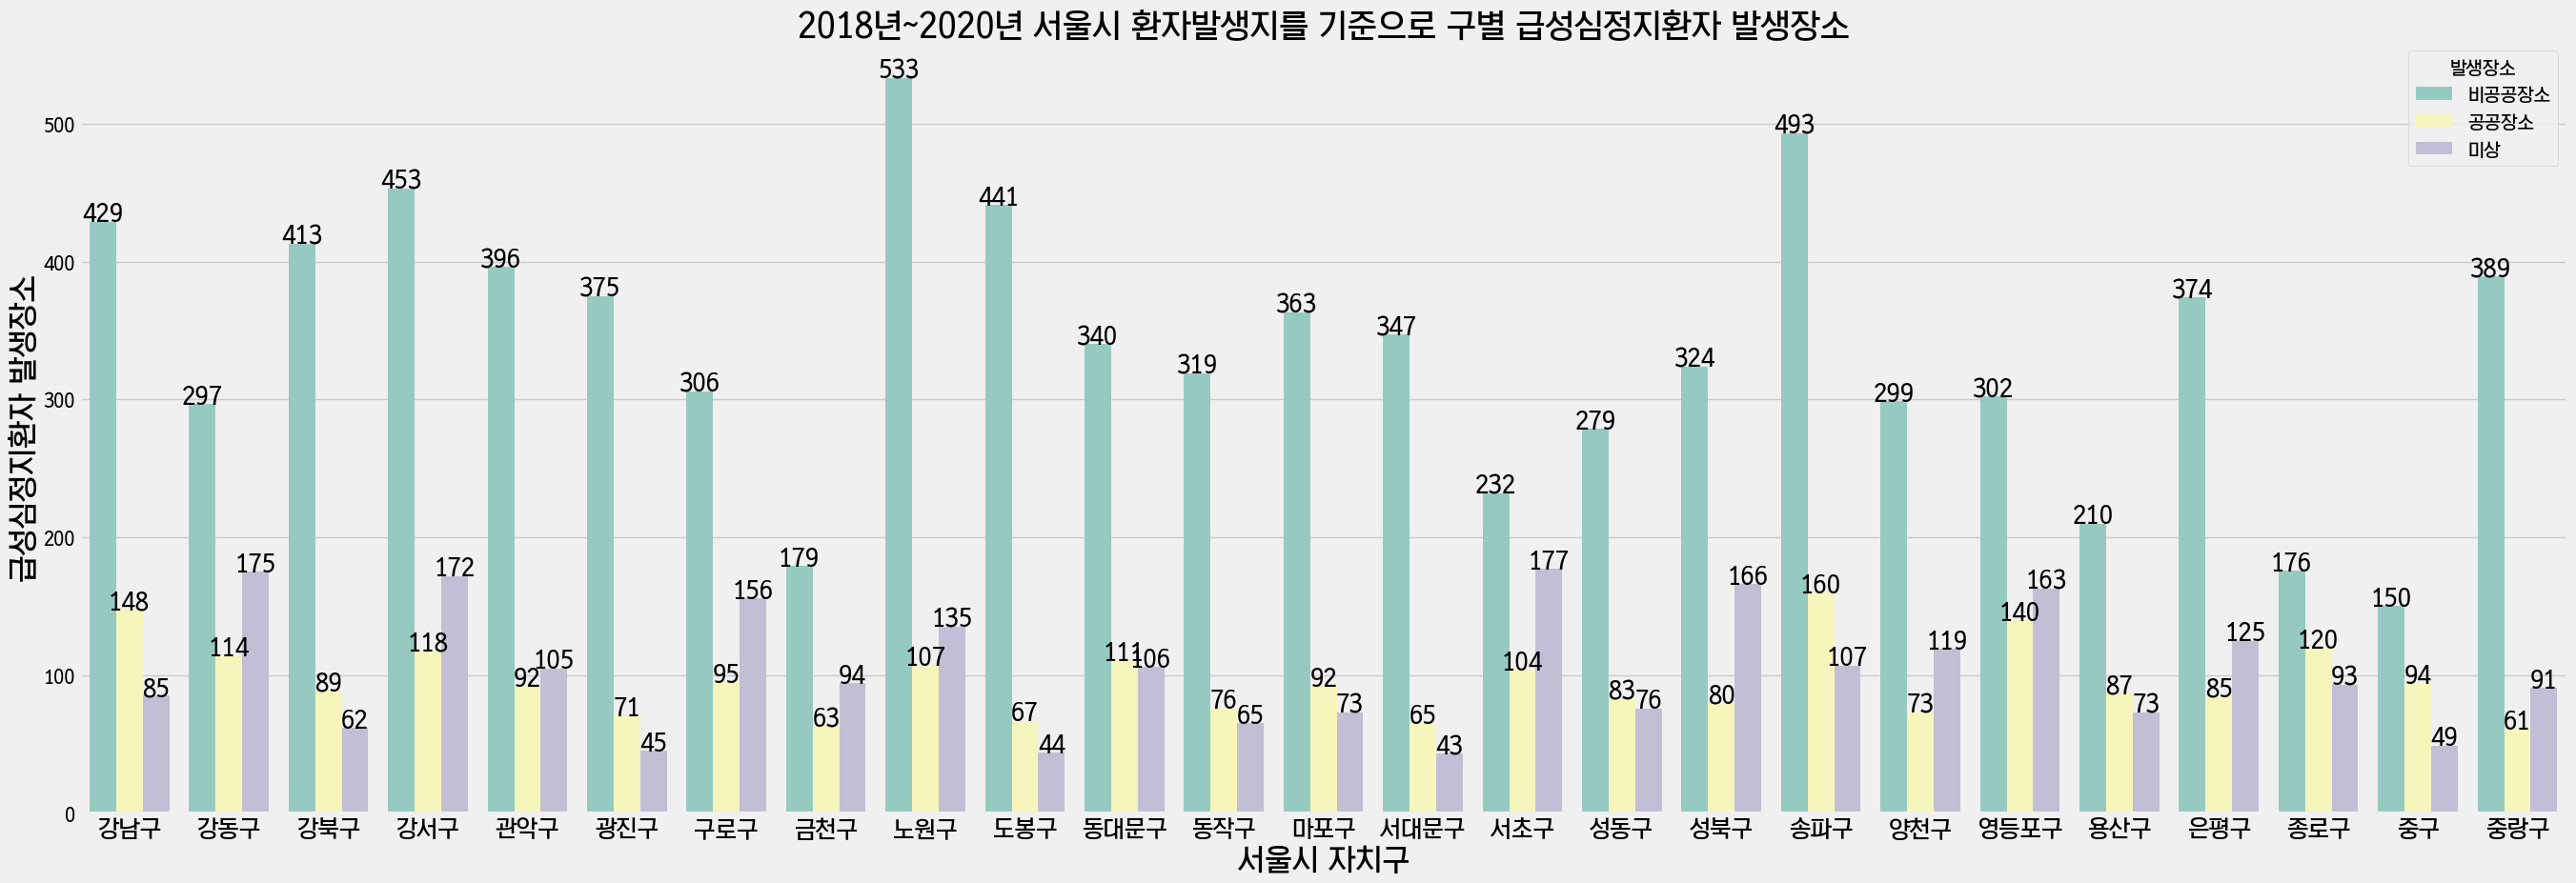

In [35]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자 발생장소
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data4, x=data4.소재지.sort_values(), hue='발생장소', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자발생지를 기준으로 구별 급성심정지환자 발생장소', size = 25)
ax.set_xlabel('서울시 자치구', size =23)
ax.set_ylabel('급성심정지환자 발생장소',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_발생지기준_급성심정지환자_발생장소.png")
plt.show()

### 9. 서울시 환자거주지를 기준으로 급성심정지환자 성별 

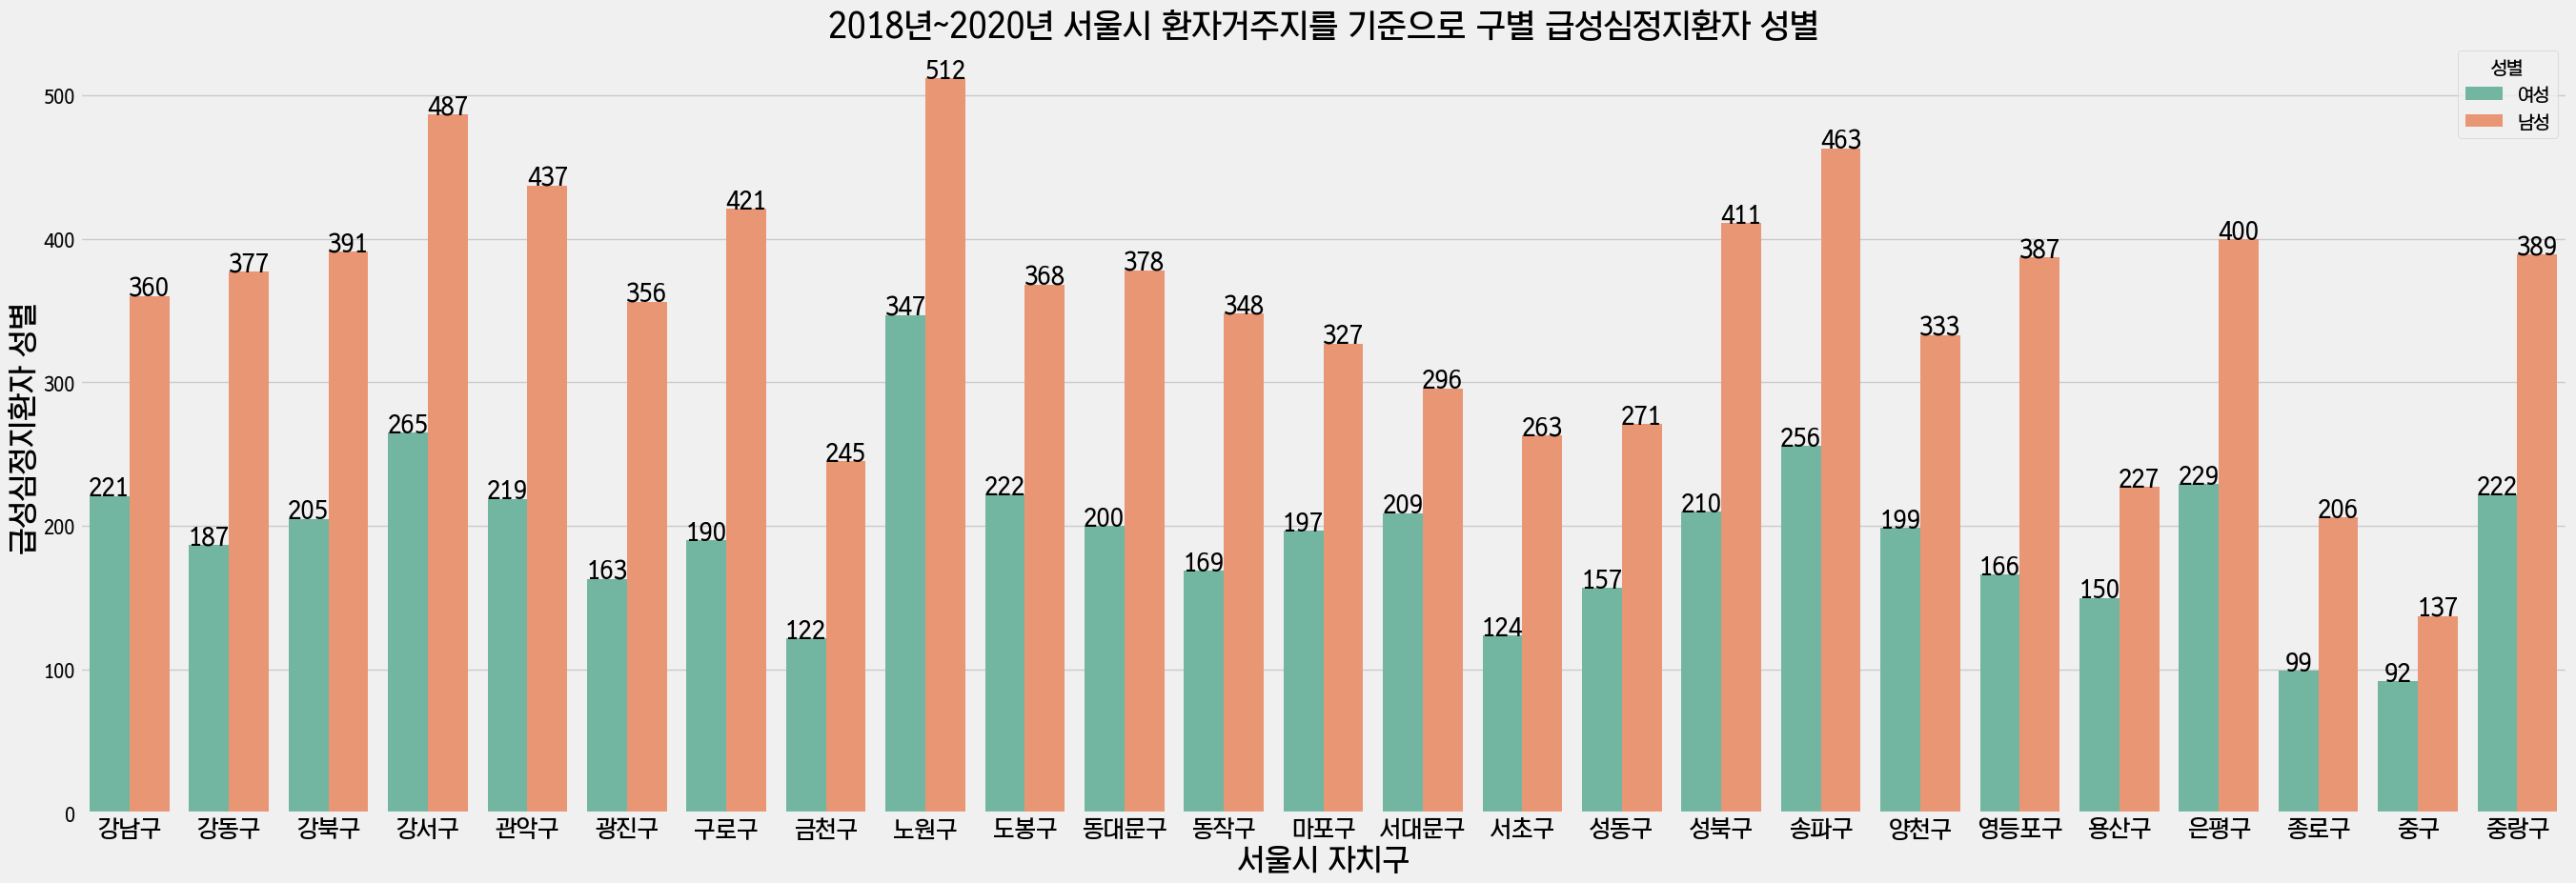

In [36]:
# 서울시 환자거주지를 기준으로 구별 급성심정지환자 성별
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data2, x=data2.소재지.sort_values(), hue='성별', palette="Set2")
ax.set_title('2018년~2020년 서울시 환자거주지를 기준으로 구별 급성심정지환자 성별', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 성별',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_거주지기준_급성심정지환자_성별.png")
plt.show()

### 10. 서울시 환자발생지를 기준으로 급성심정지환자 성별

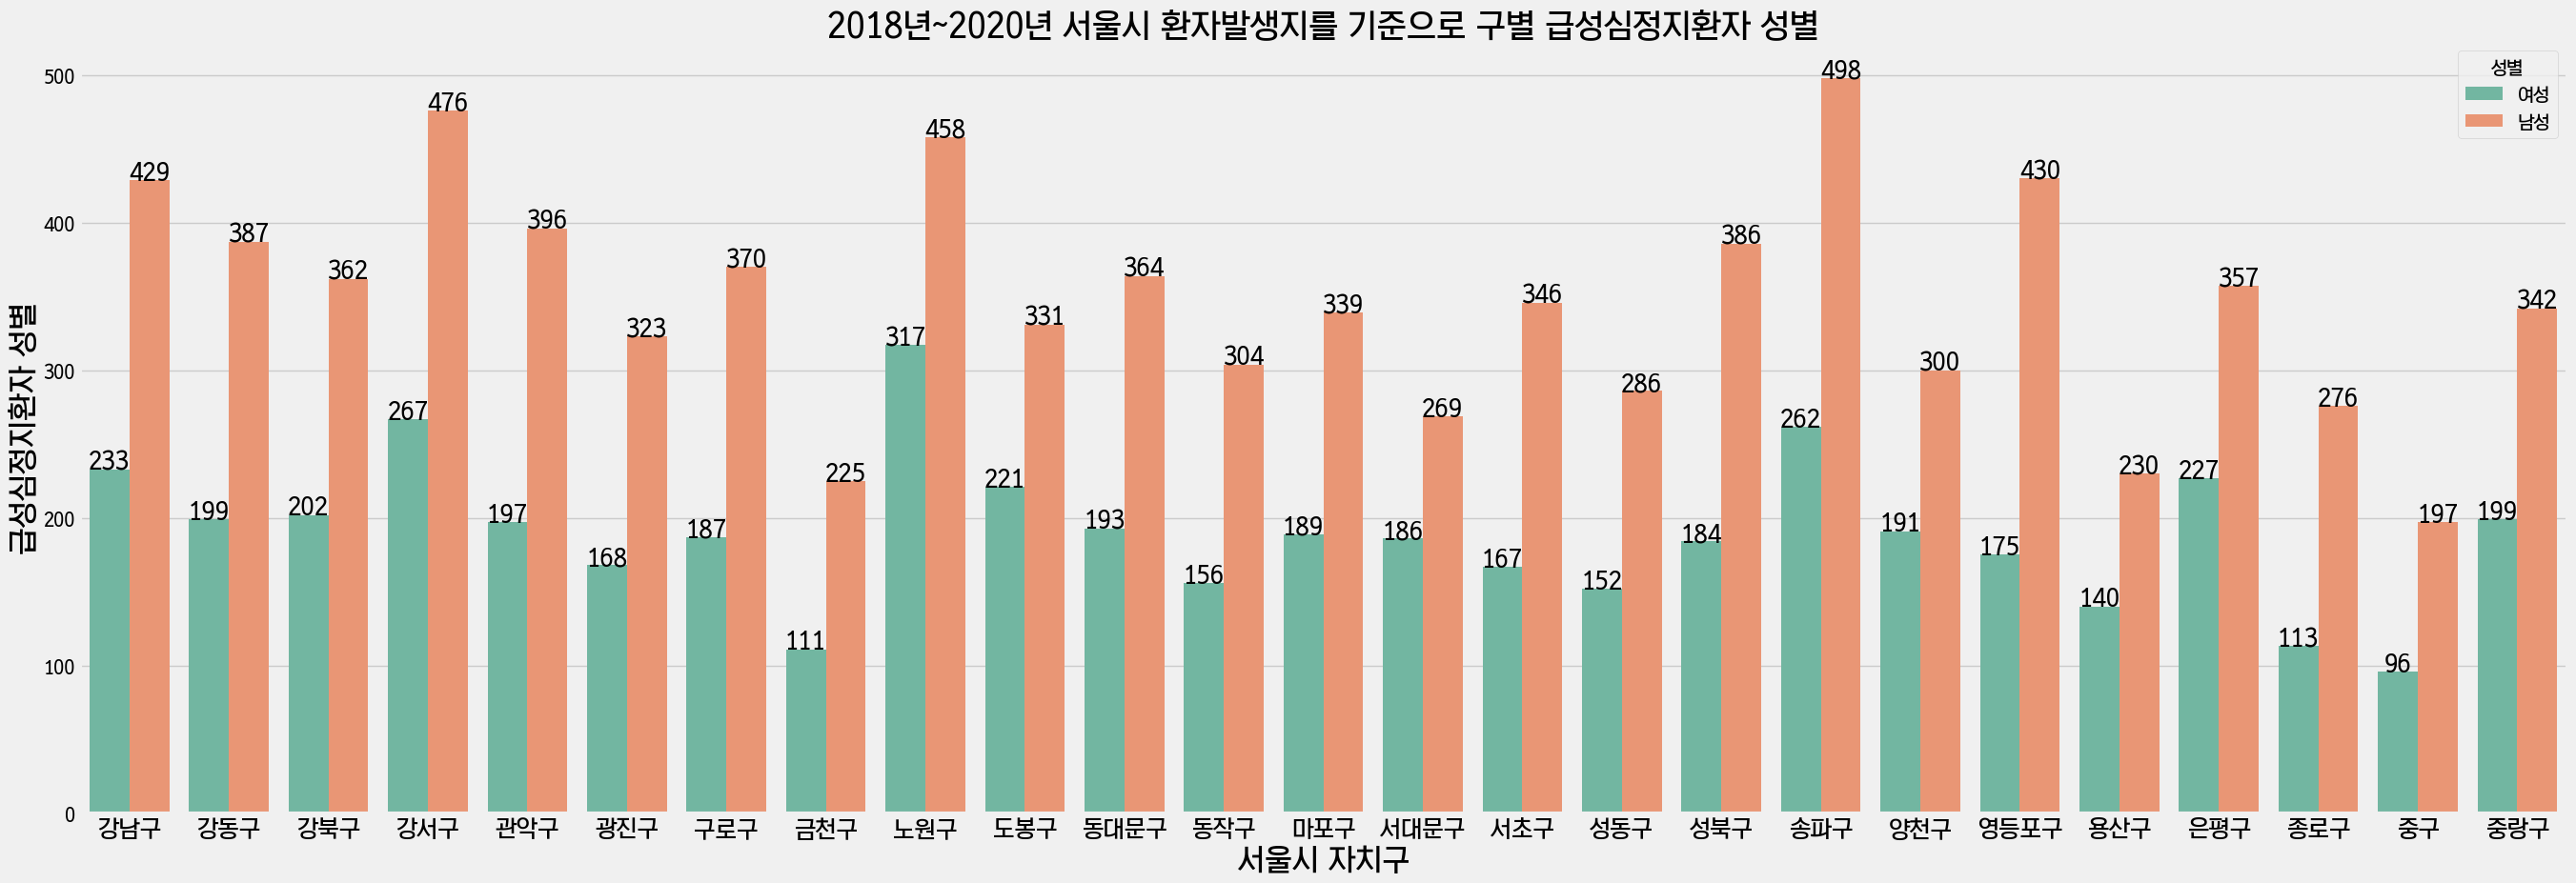

In [37]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자 성별
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data4, x=data4.소재지.sort_values(), hue='성별', palette="Set2")
ax.set_title('2018년~2020년 서울시 환자발생지를 기준으로 구별 급성심정지환자 성별', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 성별',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_발생지기준_급성심정지환자_성별.png")
plt.show()

### 11. 서울시 환자거주지를 기준으로 급성심정지환자 연령대

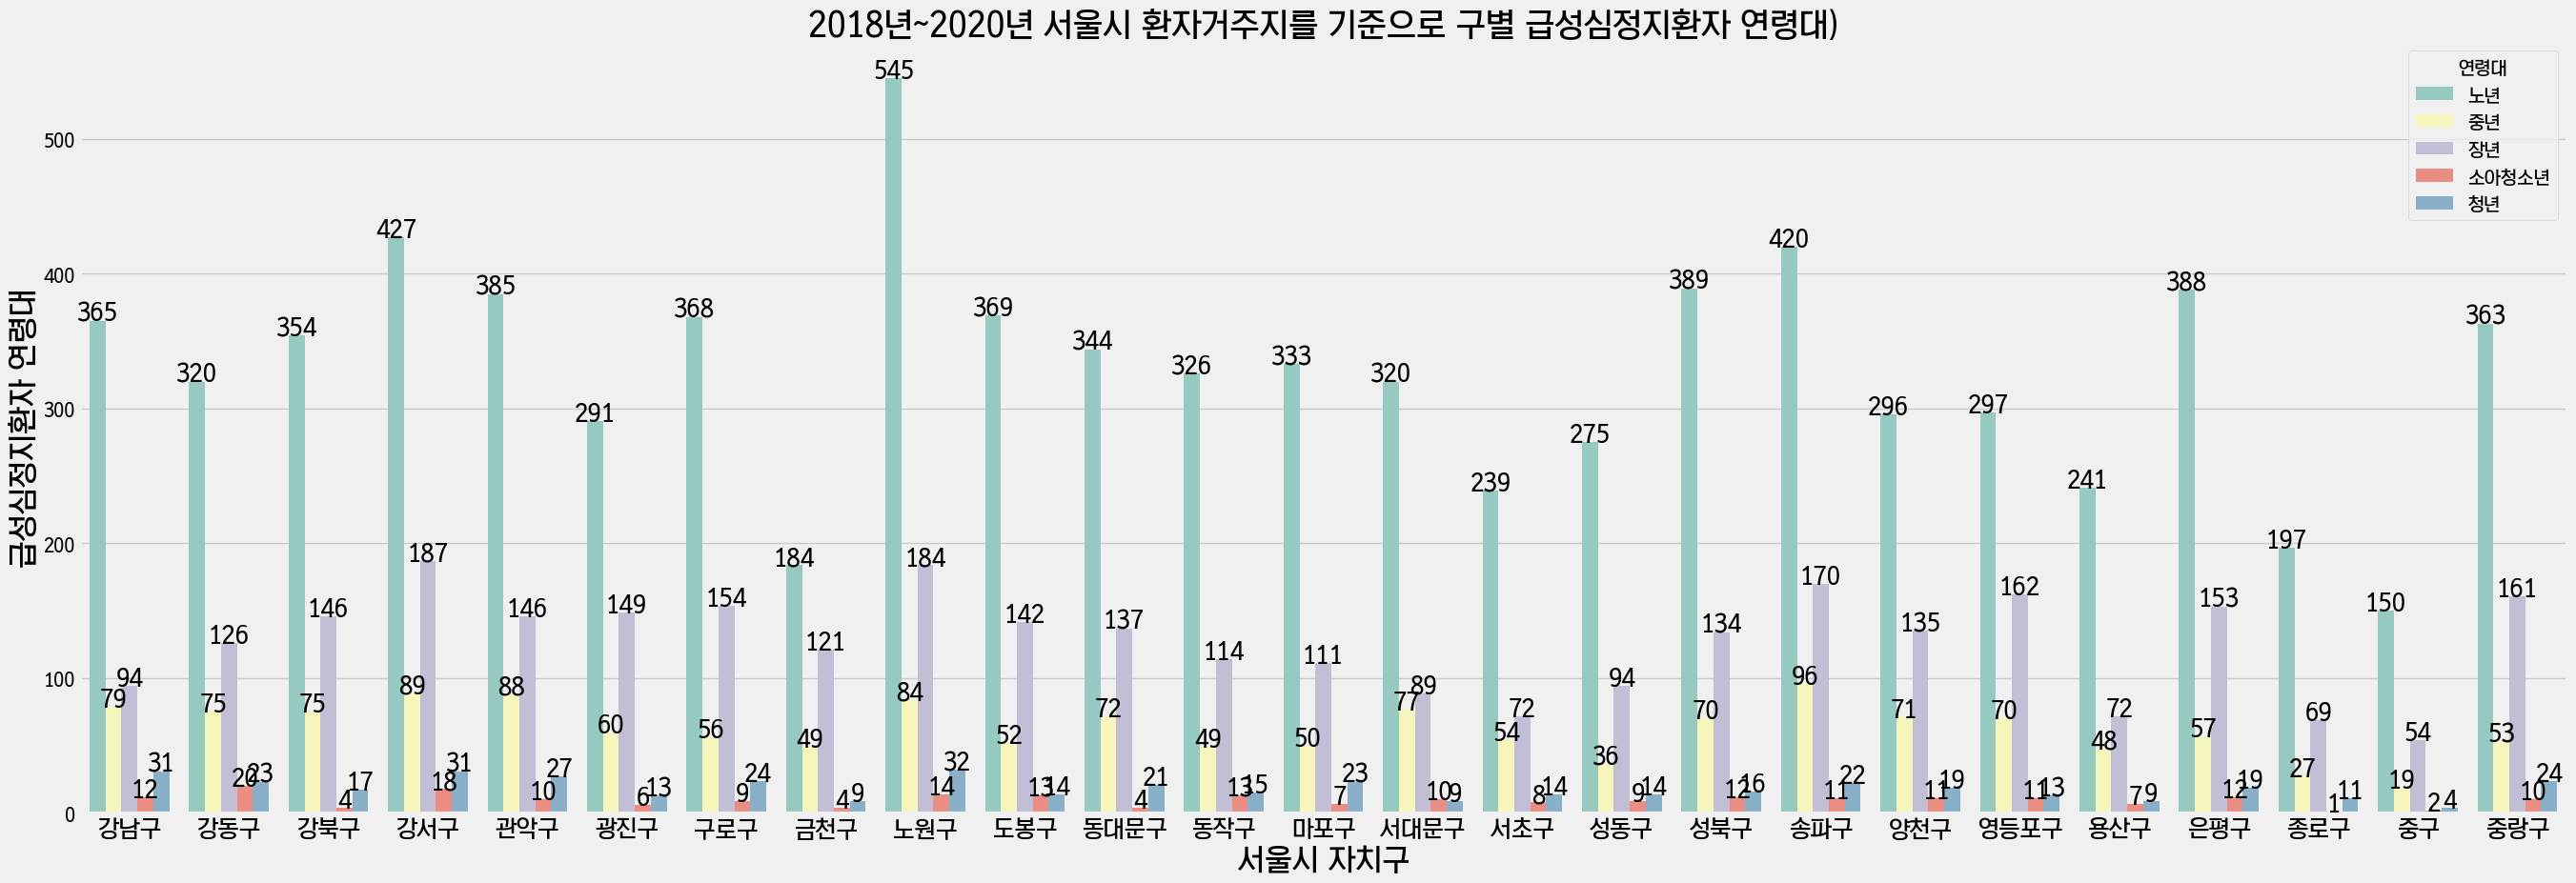

In [38]:
# 서울시 환자거주지를 기준으로 구별 급성심정지환자 연령대
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data2, x=data2.소재지.sort_values(), hue='연령대', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자거주지를 기준으로 구별 급성심정지환자 연령대)', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 연령대',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_거주지기준_급성심정지환자_연령대.png")
plt.show()

### 12. 서울시 환자발생지를 기준으로 급성심정지환자 연령대

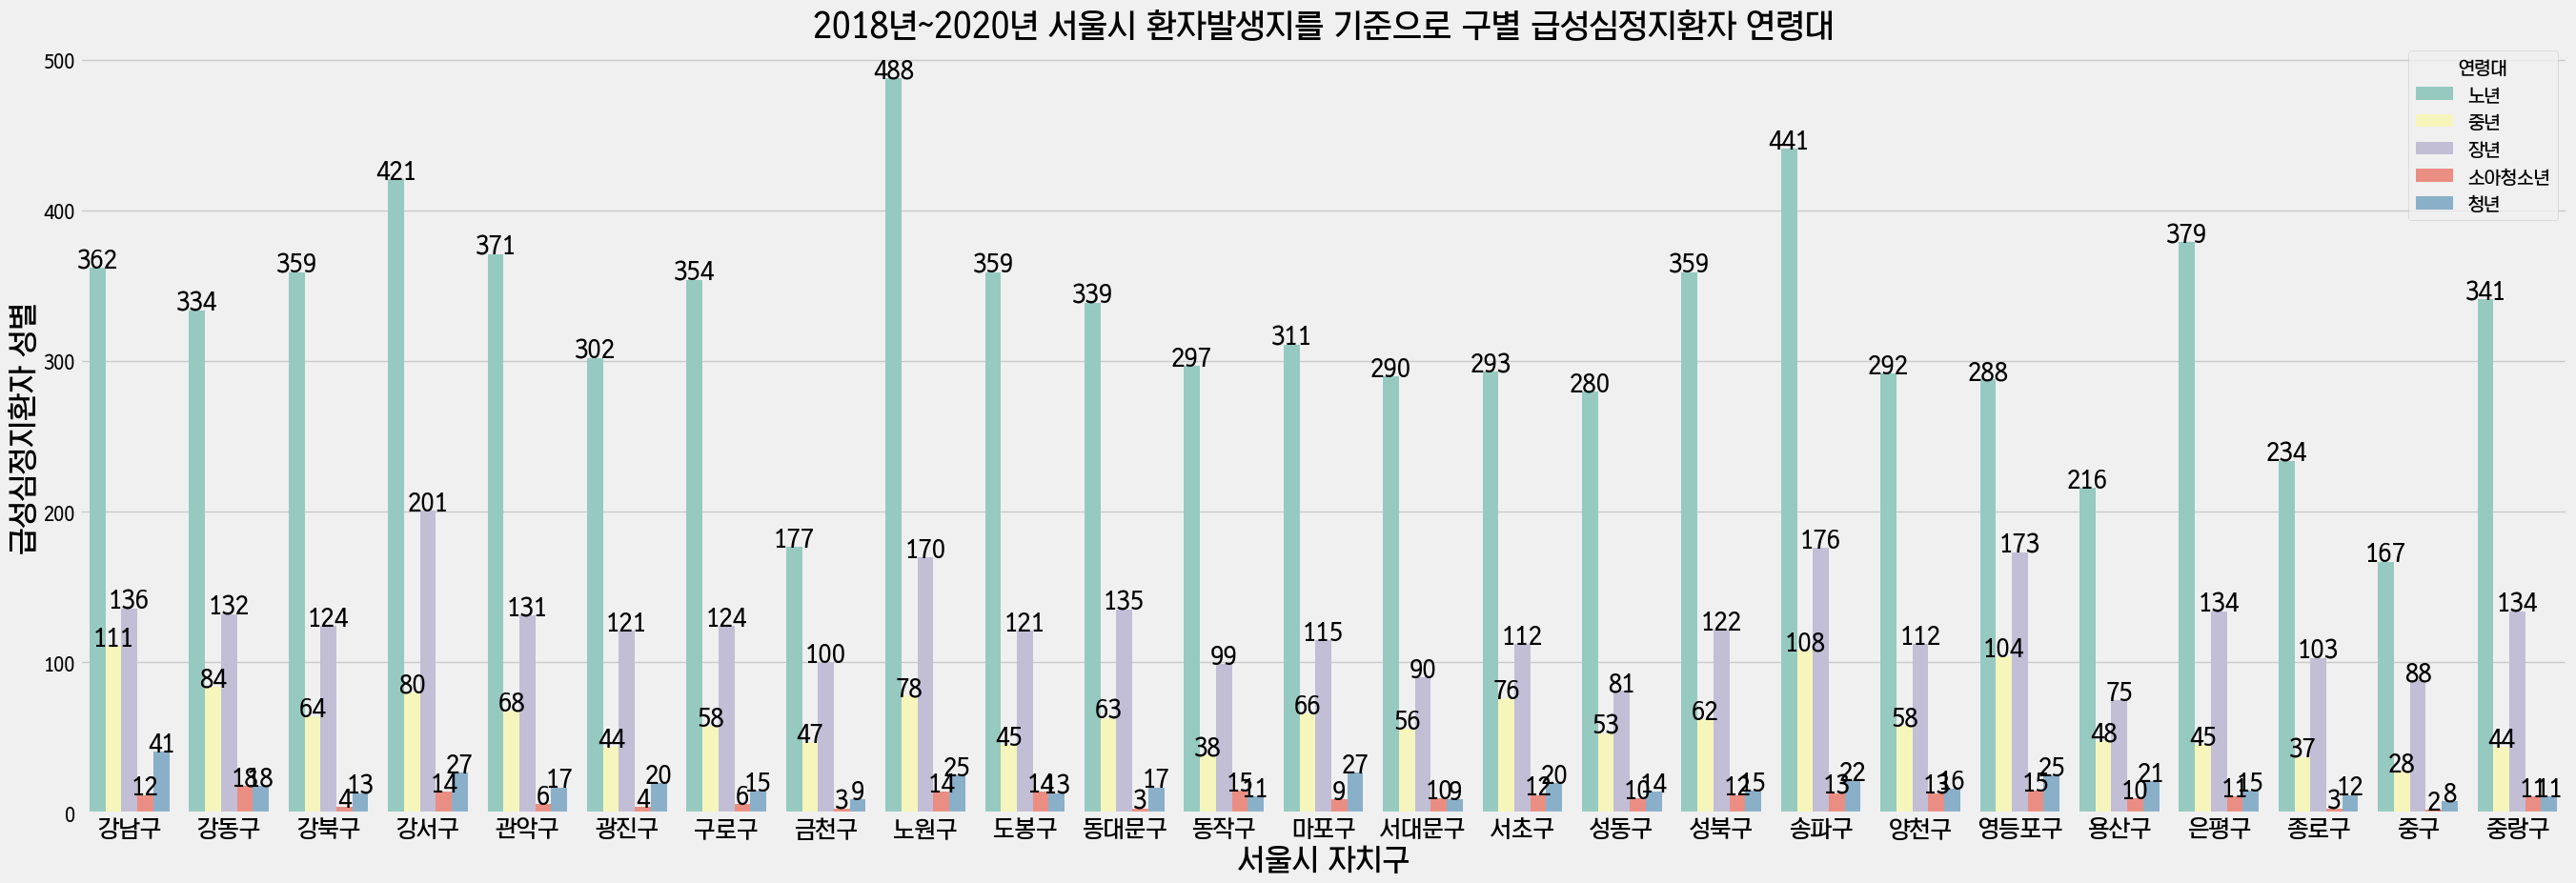

In [39]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자 연령대
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data4, x=data4.소재지.sort_values(), hue='연령대', palette="Set3")
ax.set_title('2018년~2020년 서울시 환자발생지를 기준으로 구별 급성심정지환자 연령대', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 성별',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_발생지기준_급성심정지환자_연령대.png")
plt.show()

### 13. 서울시 환자거주지를 기준으로 급성심정지환자 심폐소생술 시행종류

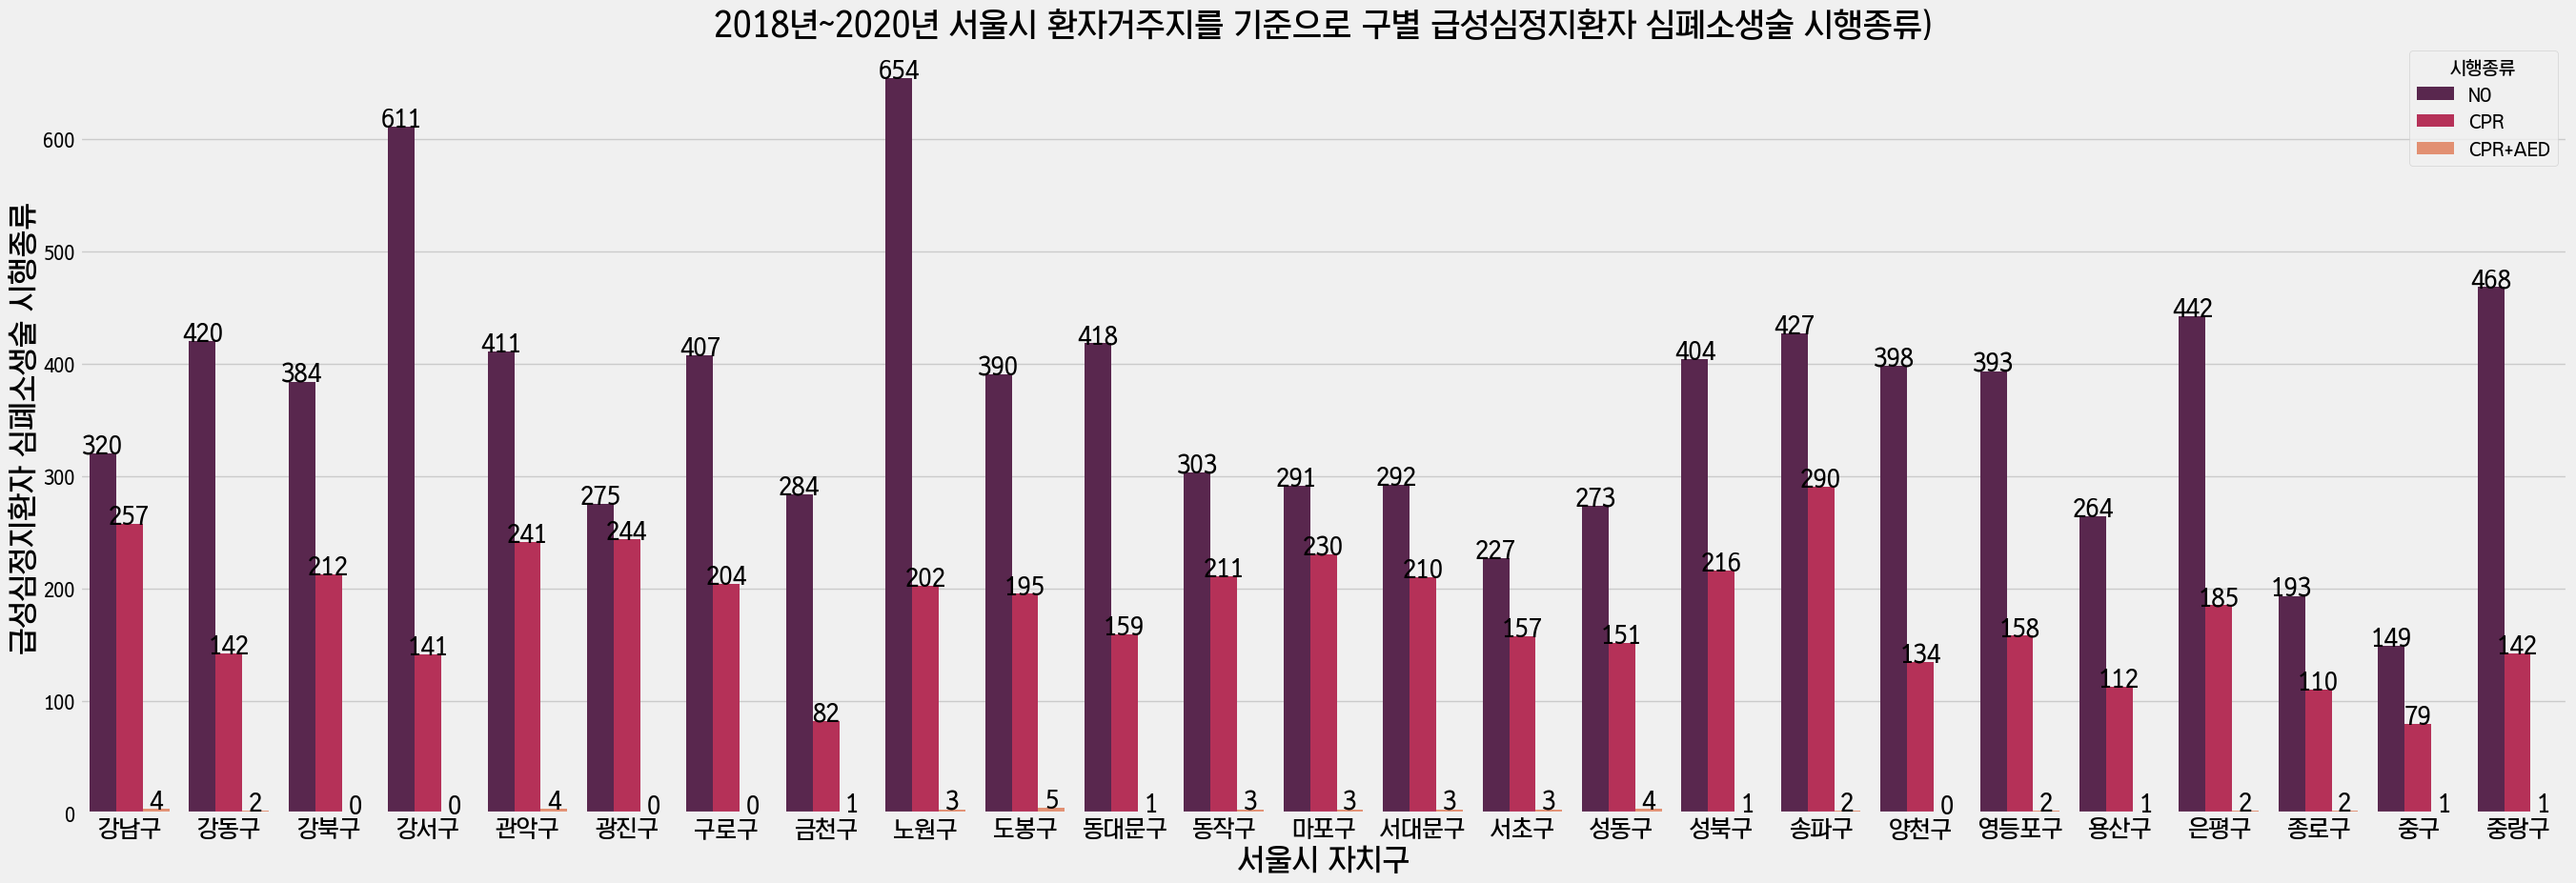

In [40]:
# 서울시 환자거주지를 기준으로 구별 급성심정지환자 심폐소생술 시행종류
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data2, x=data2.소재지.sort_values(), hue='시행종류', palette="rocket")
ax.set_title('2018년~2020년 서울시 환자거주지를 기준으로 구별 급성심정지환자 심폐소생술 시행종류)', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 심폐소생술 시행종류',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_거주지기준_급성심정지환자_심폐소생술시행종류.png")
plt.show()

### 14. 서울시 환자발생지를 기준으로 급성심정지환자 심페소생술 시행종류

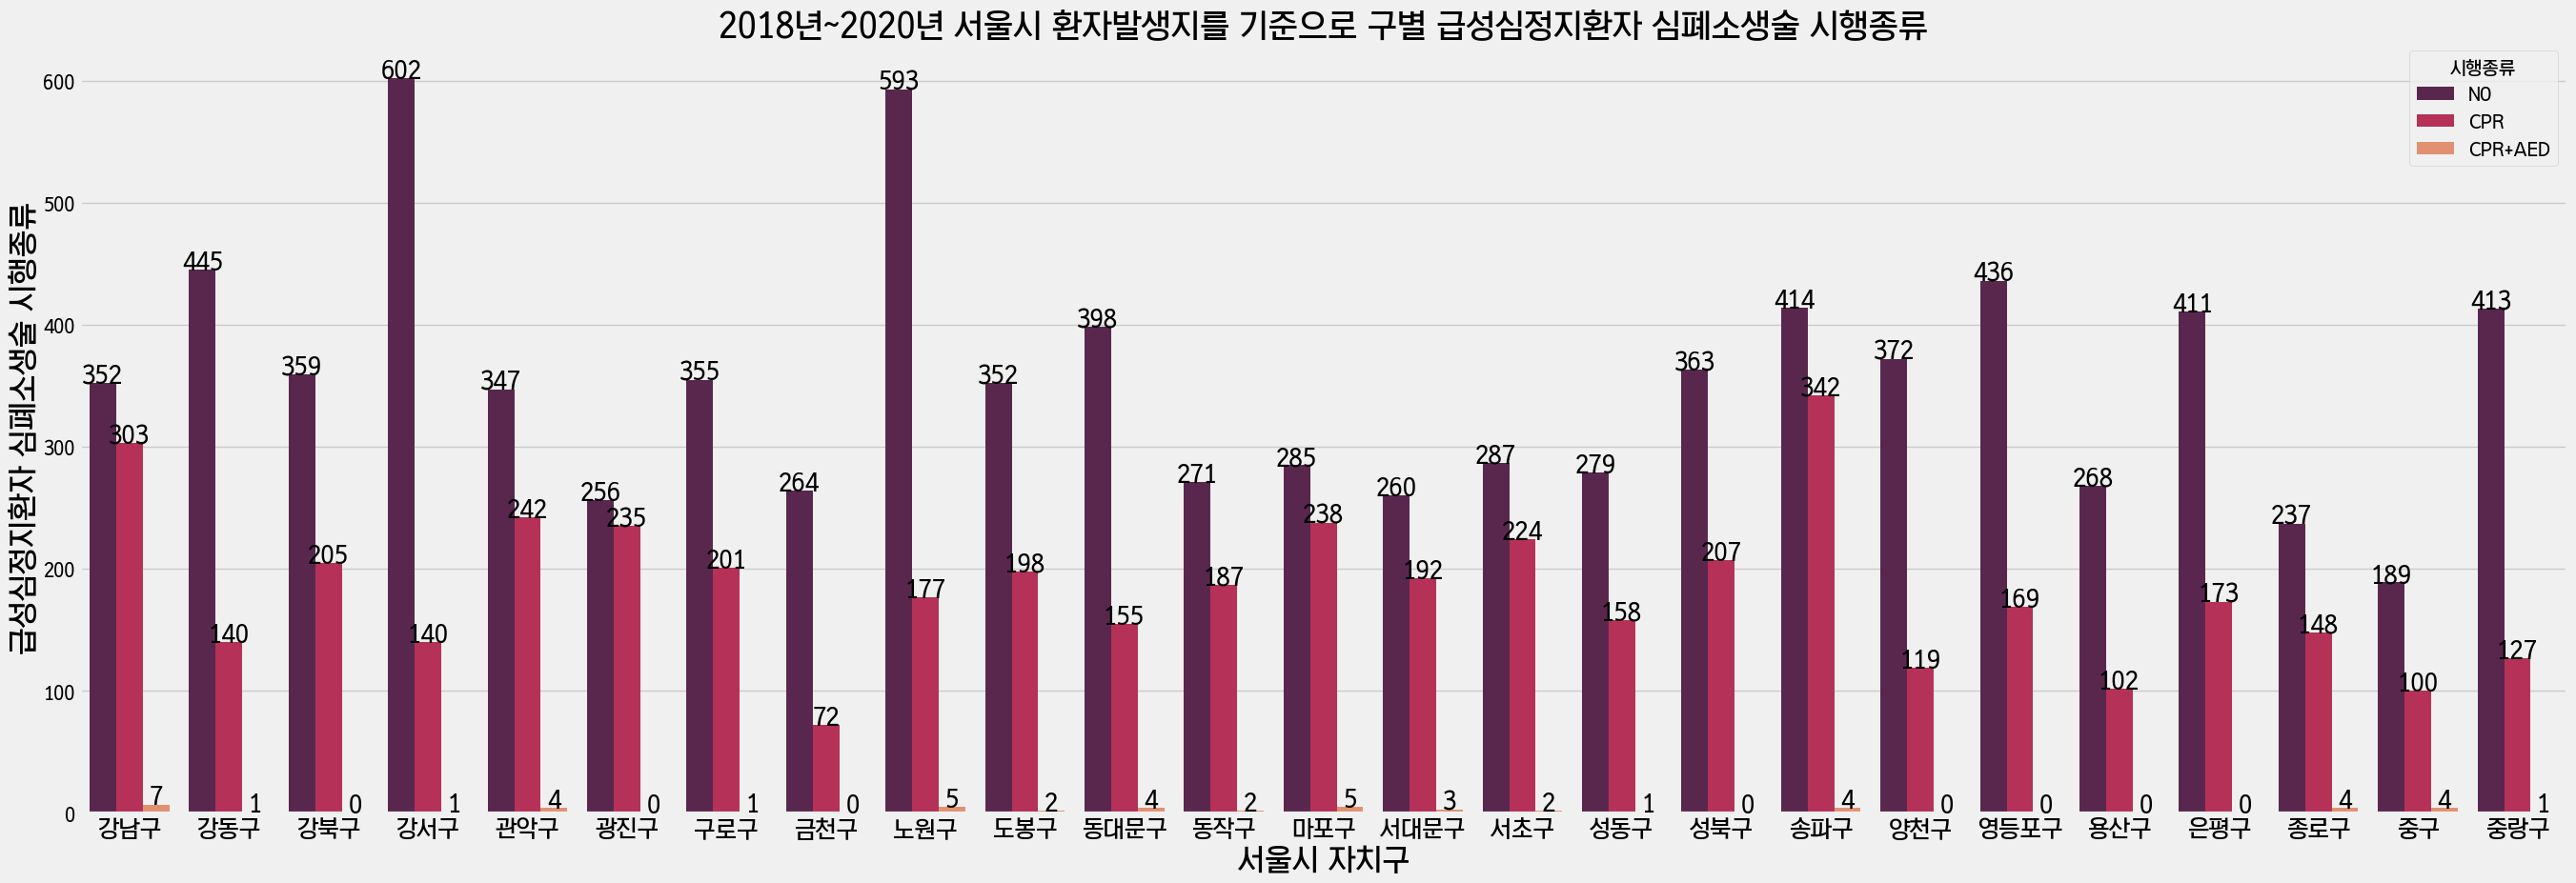

In [41]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자 심폐소생술 시행종류
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.countplot(data=data4, x=data4.소재지.sort_values(), hue='시행종류', palette="rocket")
ax.set_title('2018년~2020년 서울시 환자발생지를 기준으로 구별 급성심정지환자 심폐소생술 시행종류', size = 25)
ax.set_xlabel('서울시 자치구', size = 23)
ax.set_ylabel('급성심정지환자 심폐소생술 시행종류',size = 23)
ax.tick_params(axis="x", labelsize=18)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=18, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_발생지기준_급성심정지환자_심폐소생술시행종류.png")
plt.show()

### 15. 서울시 환자발생지를 기준으로 급성심정지환자 생존여부

In [42]:
# 2018년도/2019년도/2020년도 급성심정지환자 데이터 불러오기 
arrest_18 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_18xlsx.XLS")
arrest_19 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_19.xlsx")
arrest_20 = pd.read_excel("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/ohca_20.xlsx")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [43]:
# 필요한 컬럼만 추출 
arrest_18_df = arrest_18[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]
arrest_19_df = arrest_19[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]
arrest_20_df = arrest_20[['YEAR', 'P_ADD_CITY','P_ADD_DIST','H_SEX', 'AGE', 'F_HAPP_ADD_CITY', 'F_HAPP_ADD_DIST', 'BYSTANDER_CPR_ELSE','H_PLACE_PUBLIC', 'ER_RESULT', 'ADM_RESULT', 'H2_ER_RESULT', 'H2_ADM_RESULT']]

In [44]:
arrest_df = pd.concat([arrest_18_df, arrest_19_df, arrest_20_df])

In [45]:
# 급성심정지환자(거주지기준)
seoulgu_arrest_df = arrest_df[(arrest_df['F_HAPP_ADD_CITY']=='서울')].reset_index()
seoulgu_arrest_df

,index,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
2,2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
3,3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,4354,2020,서울,성동구,1,79,서울,성동구,NaN,9,40,NaN,NaN,NaN
13409,4355,2020,경기,수원시 장안구,1,37,서울,성동구,NaN,8,40,NaN,NaN,NaN
13410,4356,2020,서울,성동구,1,67,서울,성동구,NaN,2,40,NaN,NaN,NaN
13411,4357,2020,서울,성동구,2,68,서울,성동구,NaN,8,30,10.0,NaN,NaN


In [46]:
seoulgu_arrest_df = seoulgu_arrest_df.drop(['index'],axis='columns')
seoulgu_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13408,2020,서울,성동구,1,79,서울,성동구,NaN,9,40,NaN,NaN,NaN
13409,2020,경기,수원시 장안구,1,37,서울,성동구,NaN,8,40,NaN,NaN,NaN
13410,2020,서울,성동구,1,67,서울,성동구,NaN,2,40,NaN,NaN,NaN
13411,2020,서울,성동구,2,68,서울,성동구,NaN,8,30,10.0,NaN,NaN


In [47]:
seoulgu_death_arrest_df = seoulgu_arrest_df[
    (seoulgu_arrest_df['ER_RESULT']==40) | (seoulgu_arrest_df['ER_RESULT']==41) |
    (seoulgu_arrest_df['ADM_RESULT']==40) | (seoulgu_arrest_df['ADM_RESULT']==41) |
    (seoulgu_arrest_df['H2_ER_RESULT']==40) | (seoulgu_arrest_df['H2_ER_RESULT']==41) |
    (seoulgu_arrest_df['H2_ADM_RESULT']==40) | (seoulgu_arrest_df['H2_ADM_RESULT']==41)
]
seoulgu_death_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
0,2018,서울,용산구,2,83,서울,용산구,NaN,2,40,NaN,NaN,NaN
1,2018,서울,중구,2,67,서울,중구,NaN,2,40,NaN,NaN,NaN
3,2018,서울,동작구,1,91,서울,동작구,1.0,2,40,NaN,NaN,NaN
4,2018,서울,동작구,2,61,서울,동작구,1.0,2,40,NaN,NaN,NaN
5,2018,서울,동작구,1,73,서울,동작구,NaN,2,40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13407,2020,서울,마포구,1,28,서울,성동구,NaN,1,30,40.0,NaN,NaN
13408,2020,서울,성동구,1,79,서울,성동구,NaN,9,40,NaN,NaN,NaN
13409,2020,경기,수원시 장안구,1,37,서울,성동구,NaN,8,40,NaN,NaN,NaN
13410,2020,서울,성동구,1,67,서울,성동구,NaN,2,40,NaN,NaN,NaN


In [48]:
seoulgu_alive_arrest_df = seoulgu_arrest_df.drop(seoulgu_death_arrest_df.index)
seoulgu_alive_arrest_df

,YEAR,P_ADD_CITY,P_ADD_DIST,H_SEX,AGE,F_HAPP_ADD_CITY,F_HAPP_ADD_DIST,BYSTANDER_CPR_ELSE,H_PLACE_PUBLIC,ER_RESULT,ADM_RESULT,H2_ER_RESULT,H2_ADM_RESULT
2,2018,서울,노원구,1,46,서울,중구,NaN,1,30,10.0,NaN,NaN
7,2018,서울,동작구,1,68,서울,동작구,1.0,2,21,NaN,30.0,30.0
17,2018,서울,영등포구,1,67,서울,동작구,NaN,9,88,NaN,NaN,NaN
22,2018,서울,성북구,1,65,서울,성북구,1.0,2,30,10.0,NaN,NaN
39,2018,서울,종로구,1,54,서울,종로구,1.0,2,21,NaN,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13351,2020,서울,중구,2,82,서울,중구,1.0,2,21,NaN,30.0,30.0
13366,2020,서울,중구,1,78,서울,용산구,NaN,1,30,10.0,NaN,NaN
13395,2020,서울,성동구,1,74,서울,성동구,1.0,1,30,10.0,NaN,NaN
13397,2020,서울,송파구,2,50,서울,성동구,1.0,8,30,10.0,NaN,NaN


In [49]:
seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts()

2    737
1    501
9    302
8     36
Name: H_PLACE_PUBLIC, dtype: int64

In [50]:
seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts()

2    8419
1    2395
9    2299
8     300
Name: H_PLACE_PUBLIC, dtype: int64

In [51]:
place = pd.DataFrame(seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts())
place.columns = ['생존자 수']
place['전체'] = seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts()
place['비율'] = seoulgu_alive_arrest_df['H_PLACE_PUBLIC'].value_counts() / seoulgu_arrest_df['H_PLACE_PUBLIC'].value_counts() * 100
place.index = ['비공공장소','공공장소','미상','기타']
place.drop(['미상','기타'], inplace=True)
place

,생존자 수,전체,비율
비공공장소,737,8419,8.754009
공공장소,501,2395,20.918580


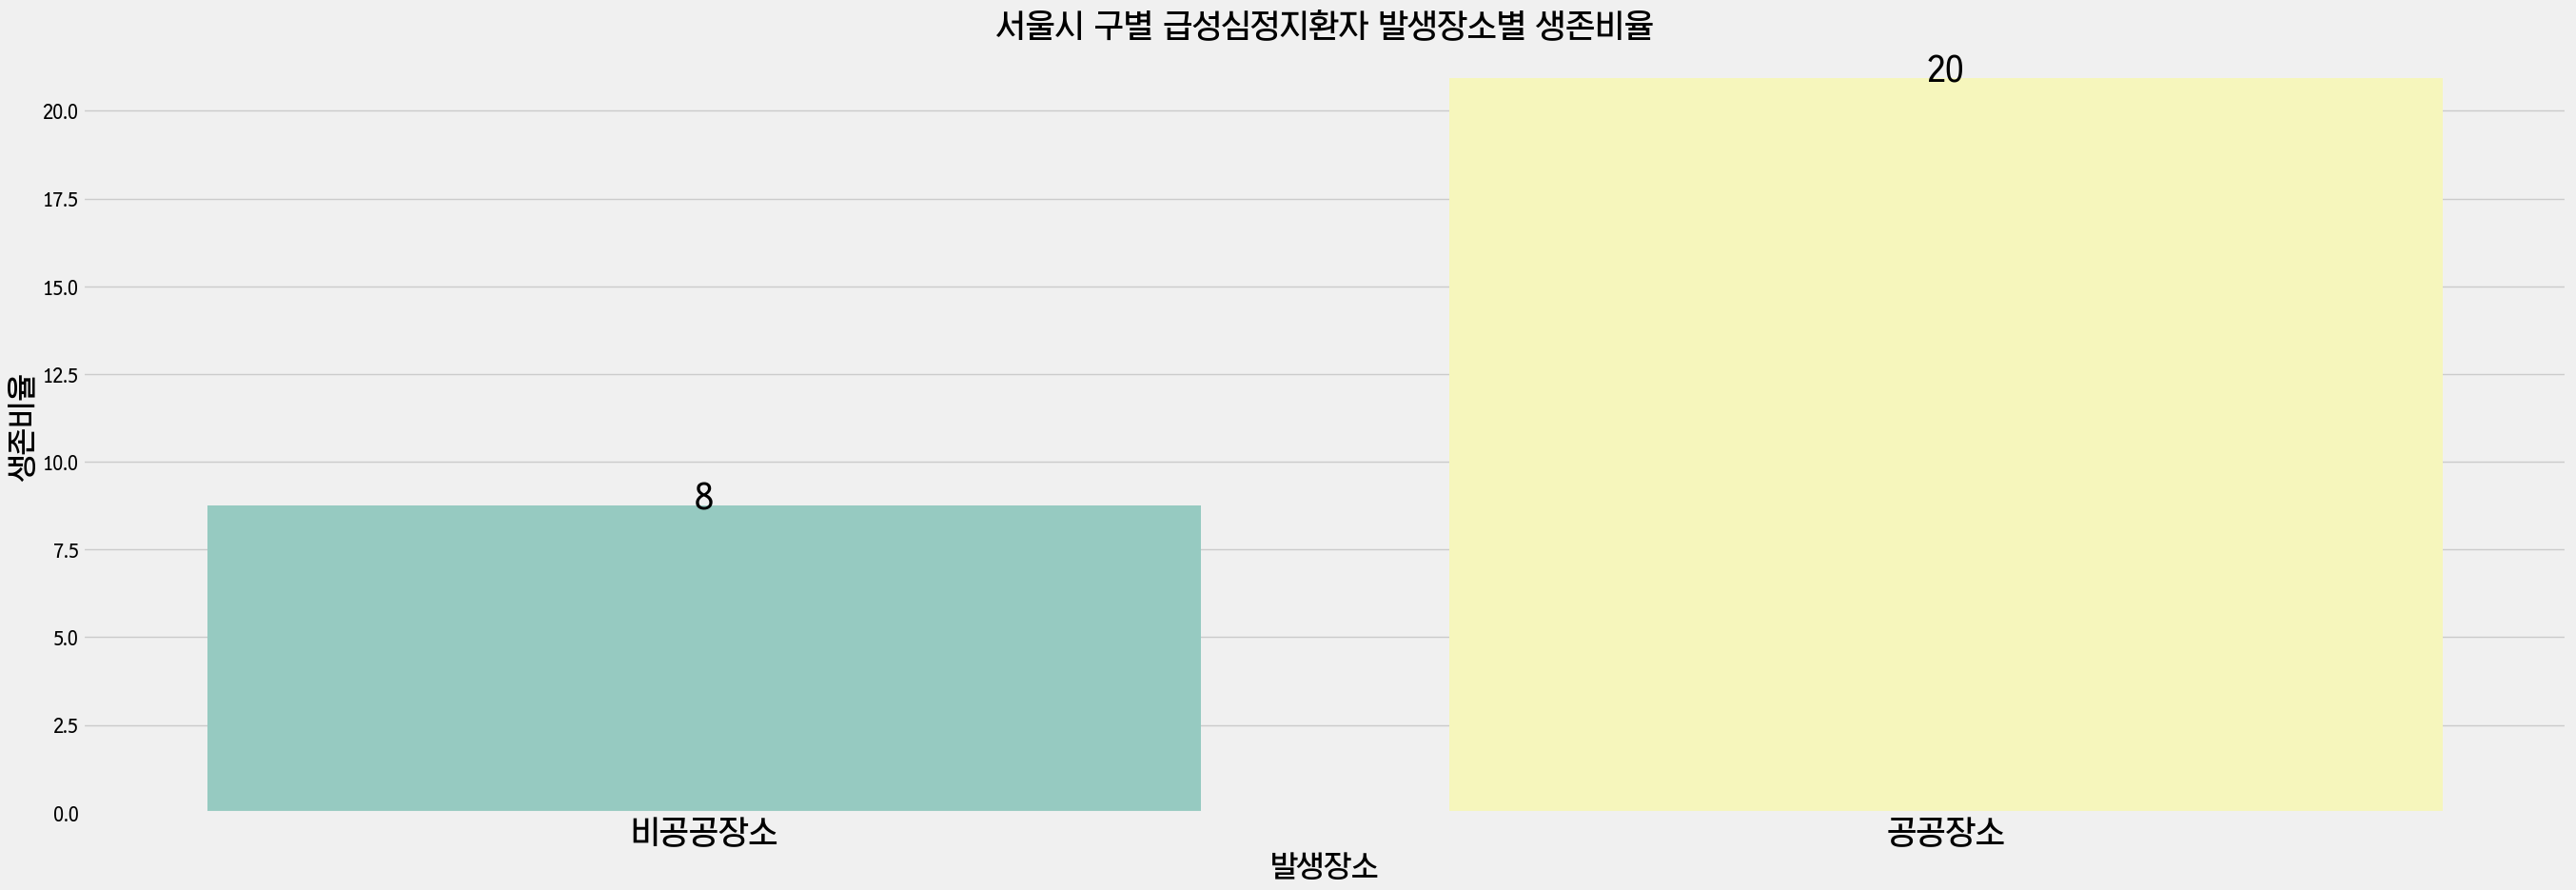

In [52]:
# 서울시 환자발생지를 기준으로 구별 급성심정지환자 생존 
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)


splot = sns.barplot(data=place, x=place.index, y='비율', palette="Set3")
ax.set_title("서울시 구별 급성심정지환자 발생장소별 생존비율", size = 25)
ax.set_xlabel("발생장소", size = 23)
ax.set_ylabel("생존비율",size = 23)
ax.tick_params(axis="x", labelsize=25)

## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=25, xytext=(0, 6),
                   textcoords='offset points')

plt.savefig("C:/sooeun/DATAexam/전공프로젝트(빅데이터)/data/서울시_구별_급성심정지환자_발생장소별_생존비율.png")
plt.show()

---